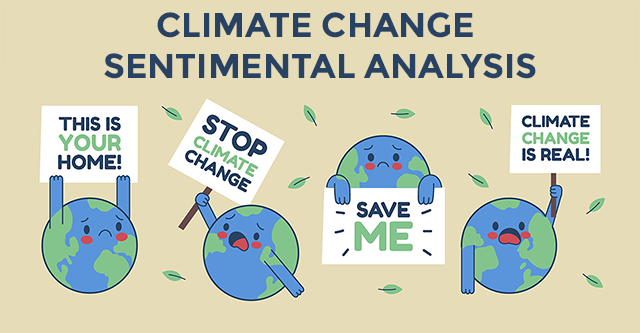

# Twitter Sentiment Classification - CLIMATE CHANGE¶

### COLLABORATORS!

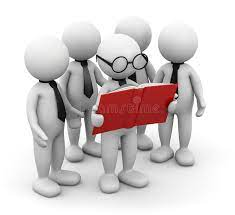





- ⚡ Emmanuel Obeng Afari - Ghana
- ⚡ Maryam Quadri - Nigeria
- ⚡ Kenechukwu Ozojie - Nigeria
- ⚡ Ndinannyi Mukwevho - South Africa
- ⚡ Babajide Adelekan - Nigeria
- ⚡ Augustine Okafor - Nigeria

## INTRODUCTION¶

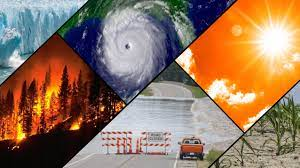

Climate change refers to long-term shifts in temperatures and weather patterns. These shifts may be natural, such as through variations in the solar cycle.

### Effects of Climate Change
- Hotter temperatures. As greenhouse gas concentrations rise, so does the global surface temperature.
- More severe storms.
- Increased drought.
- A warming, rising ocean.
- Loss of species.
- Not enough food.
- More health risks.
- Poverty and displacement.



## STATEMENT OF PROBLEM: Predict an individual’s belief in climate change based on their tweets!

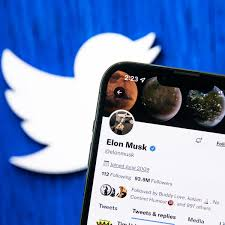


---
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging us during the Classification Sprint with the task of:
- 1. Creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.
- 2. Provide an accurate and robust solution to this task that gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories thus increasing their insights and informing future marketing strategies.
- 3. Employ `Mean F1-Score` evaluation metric for this project
- 4. Build an app using streamlit for our analysis and models and deploy the app on EC2
- 5. Communicate our findings through this notebook and a video conference presentation



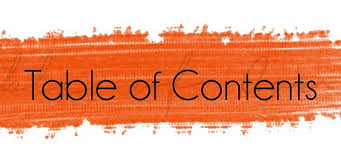

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

# Comet.ml

connecting our notebook to the version control platform comet.ml to track our experiments

In [1]:
# Importing comet_ml
import comet_ml
from comet_ml import Experiment

# Creating an experiment with your api key
experiment = Experiment(
    api_key="1rrFdt5ayFWXmQKGIvVkgyou0",
    project_name="first-project",
    workspace="kendo-shin",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in 'c:\\Users\\USER PC\\Downloads' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.com https://www.comet.com/kendo-shin/first-project/40e2e70eeb4045189e9c64f8ba88693e



 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

- ⚡ Description: Importing Packages ⚡
---
In Python, you use the import keyword to make code in one module available in another. Imports in Python are important for structuring your code effectively. Using imports properly will make you more productive, allowing you to reuse code while keeping your projects maintainable.




In [50]:
# Libraries for data loading, manipulation and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from wordcloud import WordCloud
from plotly import graph_objects as go 
sns.set()


#import spacy
%matplotlib inline


# Libraries for data preparation and model building
from sklearn.utils import resample
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score


#sns.set()
#style.use('seaborn-pastel')
#style.use('seaborn-poster')
#from PIL import Image

# Downloads
#nlp = spacy.load('en')
#nlkt libraries
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import re
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to C:\Users\USER
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\USER
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\USER
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


- ⚡ Description: Loading the datasets that will be use for our task ⚡
---
Data are generally stored in excel file formats like CSV, TXT, Excel etc. Loading data into the python environment is the most initial step of analyzing the data.

The datas of interest here is in the csv format and they are:
- train dataset
- test dataset



In [6]:
#loading the test and train dataset
train_df = pd.read_csv('data/raw/train.csv')
test_df = pd.read_csv('data/raw/test_with_no_labels.csv')

In [7]:
#Veiwing the first 5 rows of the train dataset
train_df.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [8]:
#Veiwing the first 5 rows of the test dataset
test_df.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \r\nPu...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

### Observation 
1. Train dataset (train_df):
   Has 3 columns, the **sentiment**, **message** and **tweetid**.

where:

- tweetid is the Unique numeric twitter ID for the tweet
- message is the the tweet itself
- sentiment is the class the tweet belongs to.

2. Test dataset:
   Has 2 columns, the **message** and **tweetid**
- ---

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
⚡ Description: Exploratory data analysis ⚡

In this section, we performed an in-depth analysis of all the variables in the DataFrame.
Exploratory Data Analysis (EDA) helps us to understand our data without making any assumptions.

---


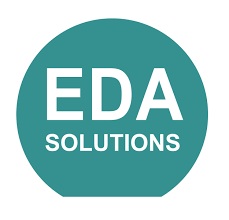

## Univariate: non-graphical

In [9]:
#Check shape of datasets
print(f'The shape of the train dataset: {train_df.shape}\nThe shape of the test dataset:  {test_df.shape}')

The shape of the train dataset: (15819, 3)
The shape of the test dataset:  (10546, 2)


OBSERVATION:
From the data above we can seee the number of rows and columns each dataframe has 

In [10]:
#check for null values in both train and test dataset 
print('Train Dataset\n************')
display(train_df.isnull().sum())

print('Test Dataset\n************')
display(test_df.isnull().sum())

Train Dataset
************


sentiment    0
message      0
tweetid      0
dtype: int64

Test Dataset
************


message    0
tweetid    0
dtype: int64

OBSERVATION: The datasets has no missing values

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


OBSERVATION:    
    The train dataset has 2 columns ('sentiment' and 'tweetid') that belongs to the integer datatype while the 'message'
    column belongs to the object datatype

---

In [12]:
# check the unique values in target feature
train_df['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

OBSERVATION:    
    The train dataset has four unique sentiment which is presented with detailed explanation of each in the image shown below

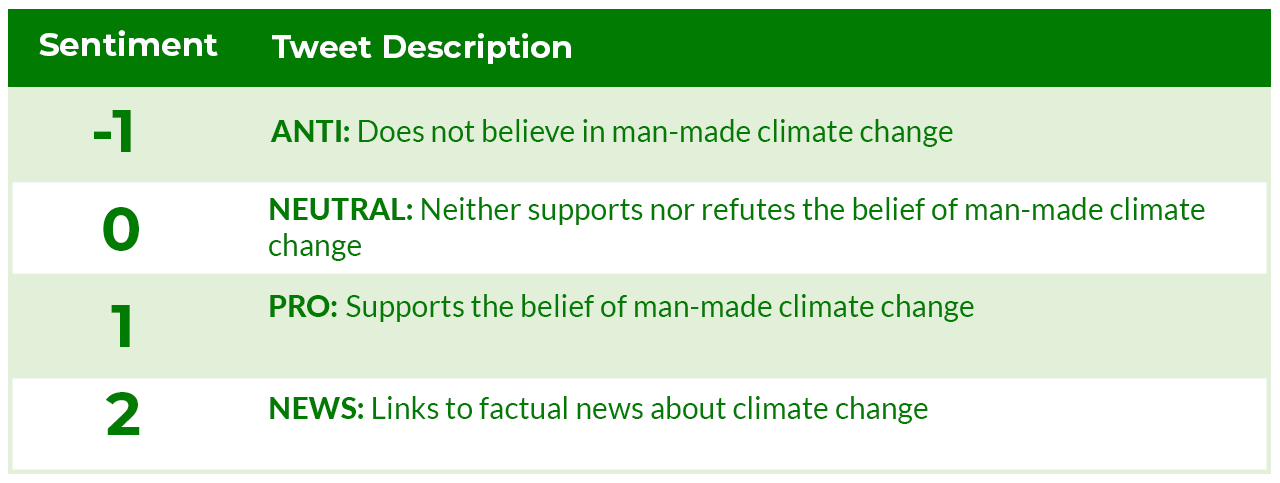

#### Checking Dupicate tweets

In [13]:
# Select all duplicate rows based on the message column from train dataset
duplicate_train_df = train_df[train_df.
                    duplicated(['message',
                                'sentiment'],
                               keep=False)]

# View top 5 duplicate rows
duplicate_train_df.shape

(1900, 3)

## Univariate: graphical

In [14]:
#function to convert class from numerical to word definition of class for a better visualisation
def class_convert(df):
    df = train_df.copy()
    word_class = []
    old_class = df['sentiment']
    
    for class_num in old_class:
        if class_num == 2:
            word_class.append('News')
        elif class_num == 1:
            word_class.append('Pro')
        elif class_num == 0:
            word_class.append('Neutral')
        else:
            word_class.append('Anti')
            
    df['sentiment'] = word_class
        
    return df

In [15]:
#calling funtion on train dataset and saving a a working copy
train_copy = class_convert(train_df)

#saving a working copy of test dataset
test_copy = test_df.copy()

In [16]:
# veiwing new train dataframes
train_copy.head()

sentiment                                            message  tweetid
0       Pro  PolySciMajor EPA chief doesn't think carbon di...   625221
1       Pro  It's not like we lack evidence of anthropogeni...   126103
2      News  RT @RawStory: Researchers say we have three ye...   698562
3       Pro  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4       Pro  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [17]:
#checking message count grouped by sentiment
sentiment_temp_table = train_copy.groupby('sentiment').count()['message'].reset_index().sort_values(by='message', ascending=False)
sentiment_temp_table

sentiment  message
3       Pro     8530
2      News     3640
1   Neutral     2353
0      Anti     1296

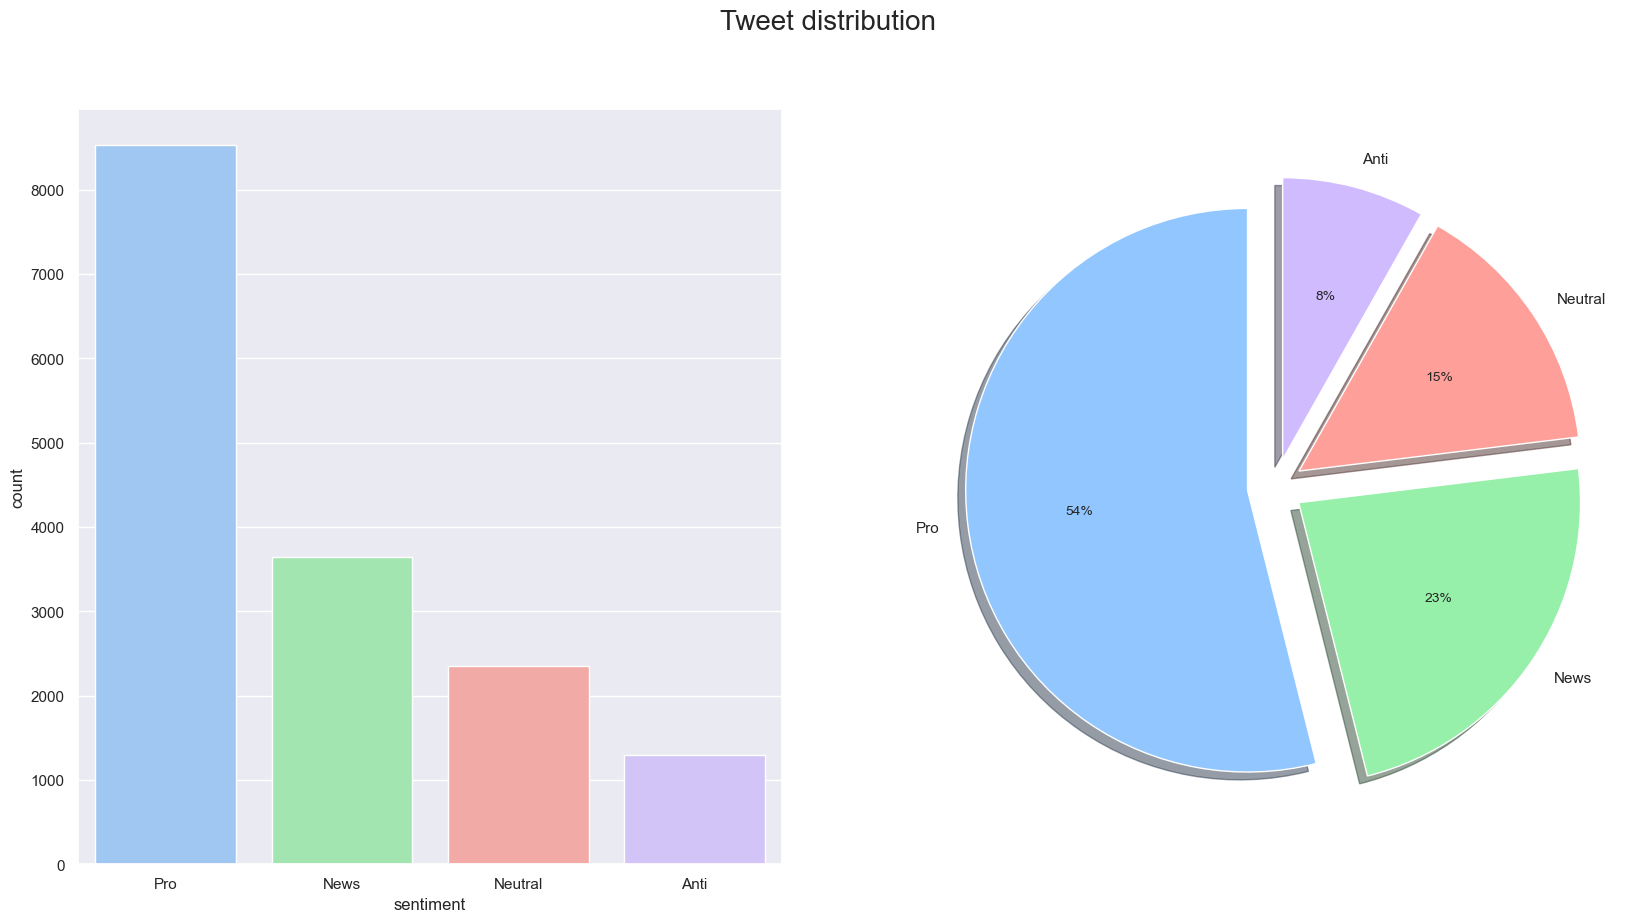

In [18]:
# Display target distribution
style.use('seaborn-pastel')

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 10), 
                         dpi=100)

sns.countplot(train_copy['sentiment'], ax=axes[0])

labels=['Pro', 'News', 'Neutral', 'Anti'] 

axes[1].pie(train_copy['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.suptitle('Tweet distribution', fontsize=20)
plt.show()

OBSERVATION:    
    The table shows an imbalanced dataset with Pro having the heights, with a count of 8530 representing 53.9% of total observations whereas Anti has a count of 1296 representing just 8.1% of total observation. This needs to be taken care of later to prevent the issue of bias when we train the dataset with our machine learning  model. Failure to balance observation for each target while cause our model to perform very well on targets with higher representation but poorly on under represented targets

### WORDCLOUD VISUALISATION

visualise entire word tweet

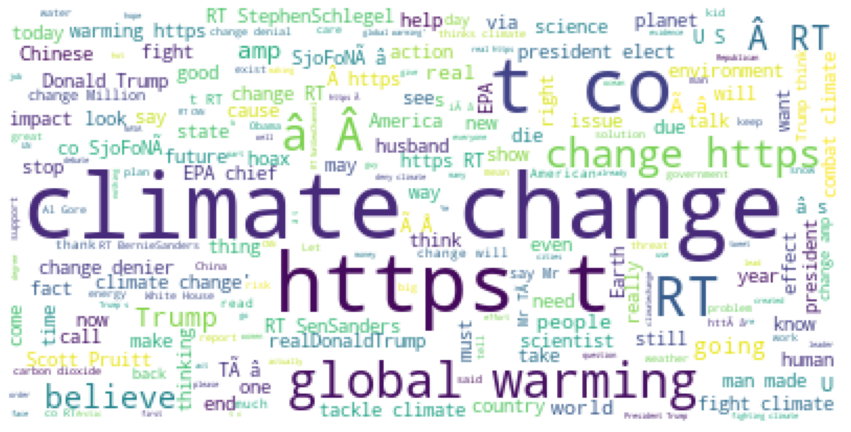

In [19]:
#visualising the entire tweet text to see the most frequent used word in relation to climate
full_text = " ".join(train_df['message'])
wc = WordCloud(background_color='white')
img = wc.generate(full_text)
plt.figure(figsize= (15,15))
plt.imshow(img)
plt.axis('off')
plt.show()

Visualise word tweets in sentiment categories

In [20]:
senti_gb = train_copy.groupby('sentiment')

In [21]:
Anti = "".join(senti_gb.get_group('Anti')['message'])
Neutral = "".join(senti_gb.get_group('Neutral')['message'])
Pro = "".join(senti_gb.get_group('Pro')['message'])
News = "".join(senti_gb.get_group('News')['message'])

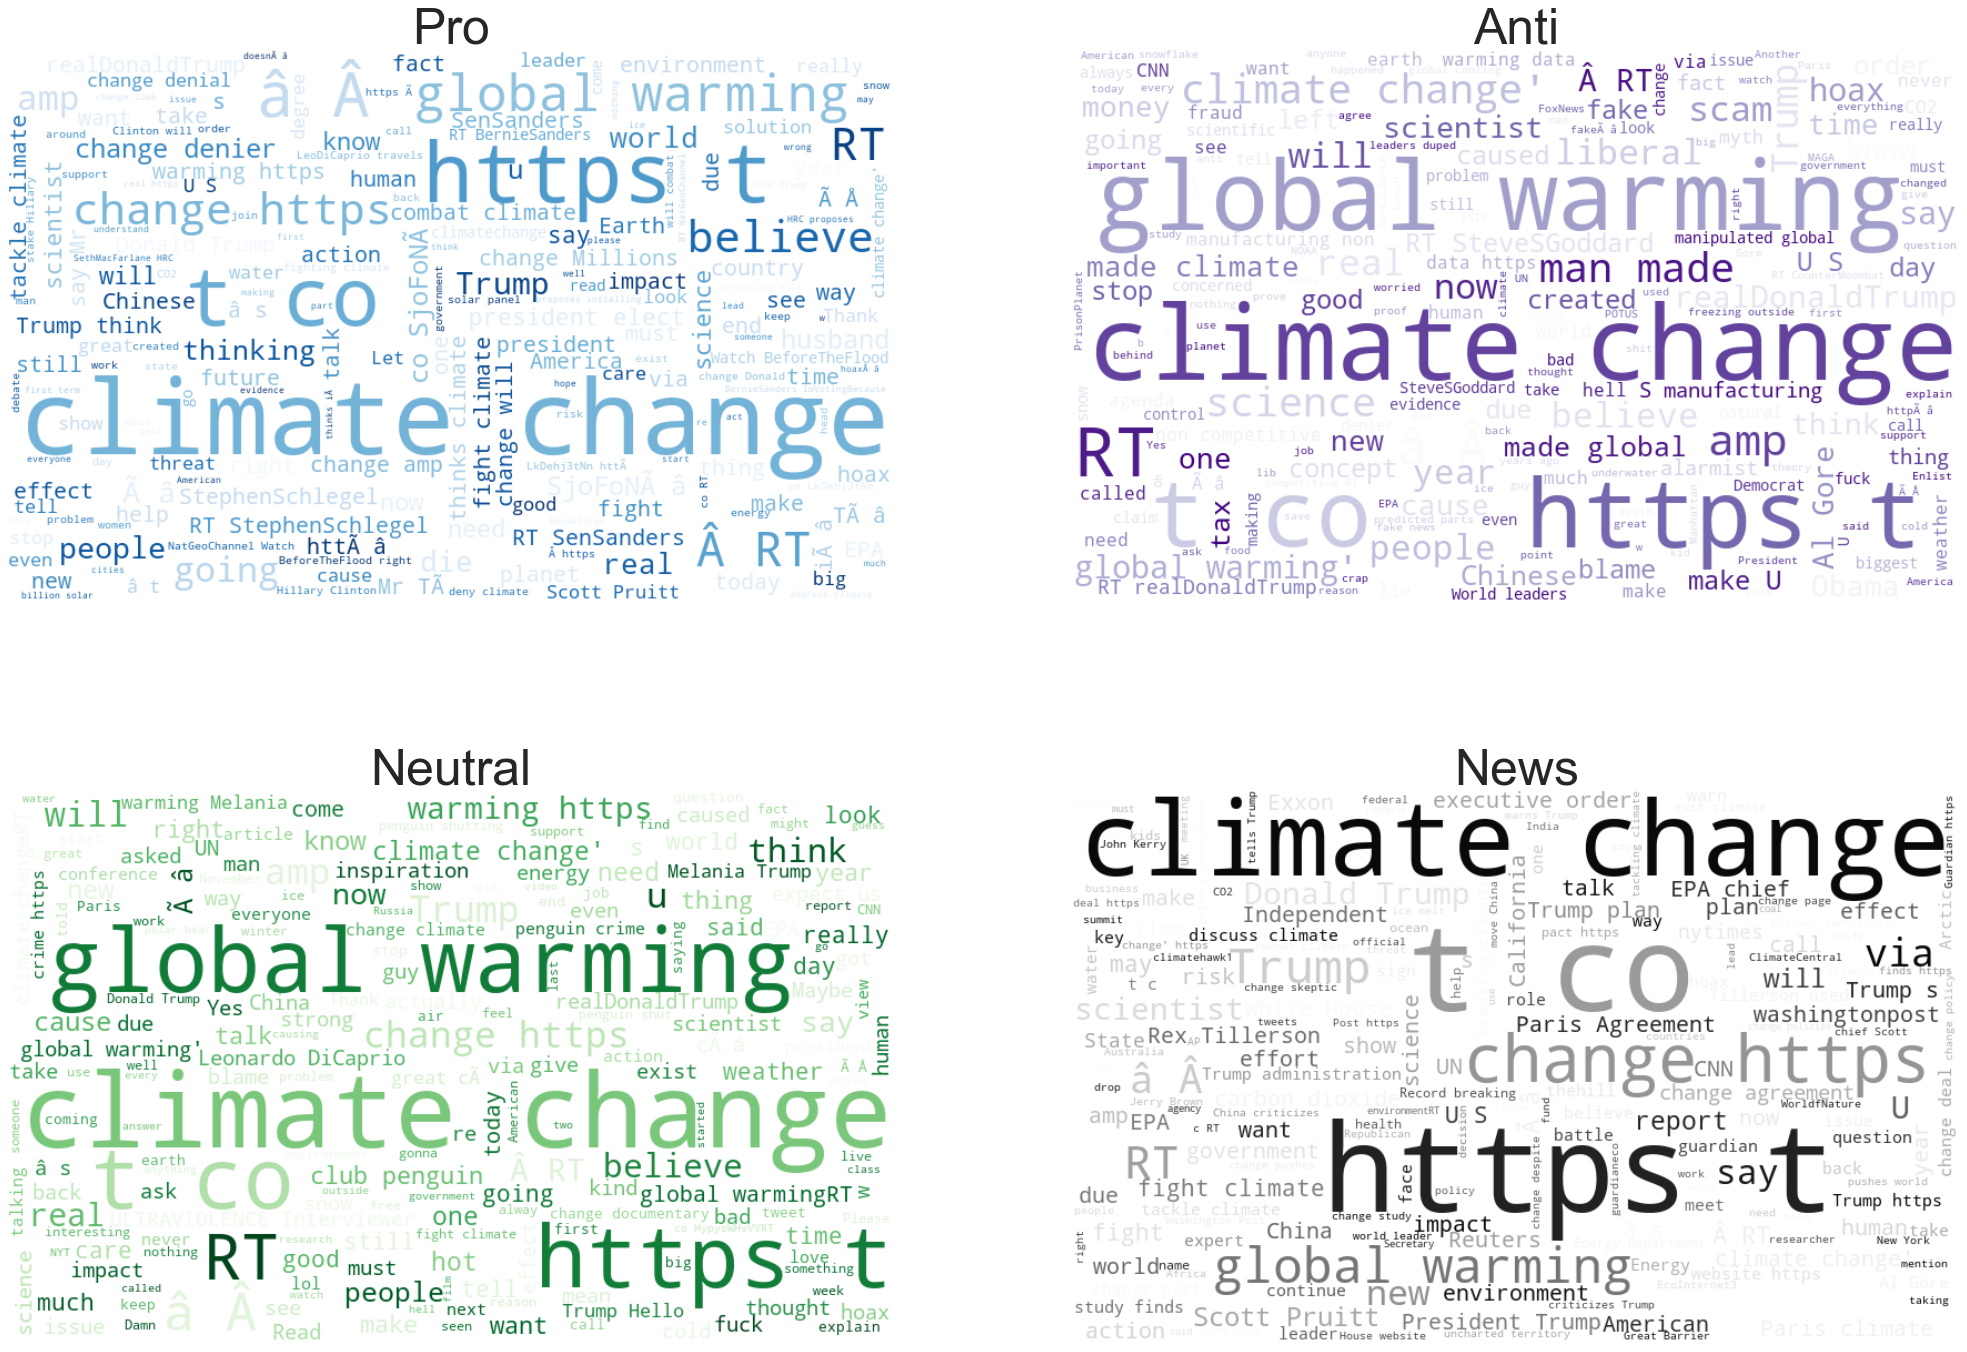

In [22]:
# Create wordcloud for the anti climate change class
Anti_wc = WordCloud(width=800, 
                           height=500, 
                           random_state=110, 
                           max_font_size=110, 
                           background_color='white',
                           colormap="Purples").generate(Anti)

# Create wordcolud for the pro climate change class
Pro_wc = WordCloud(width=800, 
                          height=500, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Blues").generate(Pro)

# Create wordcolud for the news climate change class
News_wc = WordCloud(width=800, 
                          height=500, 
                          random_state=0, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greys").generate(News)

# Create wordcolud for the neutral climate change class
Neutral_wc = WordCloud(width=800, 
                          height=500, 
                          random_state=10, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greens").generate(Neutral)

# Plot pro and anti wordclouds next to one another for comparisson
fig, arr = plt.subplots(2,2, figsize=(35,25))
arr[0,0].imshow(Pro_wc, interpolation="bilinear")
arr[0,1].imshow(Anti_wc, interpolation="bilinear")
arr[1,0].imshow(Neutral_wc, interpolation="bilinear")
arr[1,1].imshow(News_wc, interpolation="bilinear")

# Remove the ticks on the x and y axes
for ax in fig.axes:
    plt.sca(ax)
    plt.axis('off')

arr[0,0].set_title('Pro', fontsize=50)
arr[0,1].set_title('Anti', fontsize=50)
arr[1,0].set_title('Neutral', fontsize=50)
arr[1,1].set_title('News', fontsize=50)
#plt.tight_layout()
plt.show()


OBSERVATION:    
    We can see some of the most frequent words used in tweets with the greatest sentiment in each class from these word clouds, which gives us some idea of the kinds of words a tweet with a particular sentiment might contain. Pro class, for instance, uses terms and phrases like "fight climate" and "tackle climate" while Anti uses words and phrases like "scam" and "hoax"

In [23]:
train_copy.head()

sentiment                                            message  tweetid
0       Pro  PolySciMajor EPA chief doesn't think carbon di...   625221
1       Pro  It's not like we lack evidence of anthropogeni...   126103
2      News  RT @RawStory: Researchers say we have three ye...   698562
3       Pro  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4       Pro  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

Number of hashtags per sentiment class


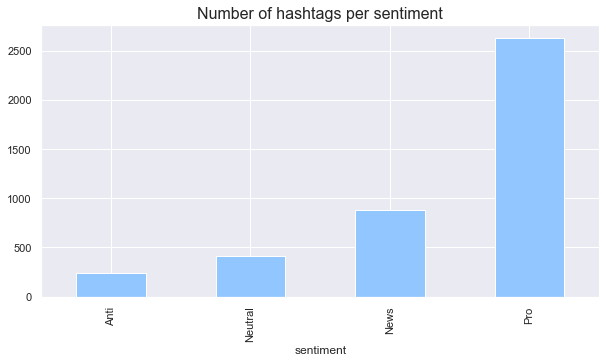

In [27]:
#visual count of use of each sentiment as a hashtag

train_copy['hashtags'] = train_copy['message'].apply(lambda x: len(re.findall(r'[#]',x)))
print('Number of hashtags per sentiment class')
train_copy.groupby('sentiment').sum()['hashtags']


plot9 = plt.figure(figsize=(10,5))
plt.title('Number of hashtags per sentiment',fontsize = 16)
train_copy.groupby('sentiment').sum()['hashtags'].plot(kind='bar')
plt.show()

The above bar chart shows the number of hashtags per class

Number of urls per sentiment class


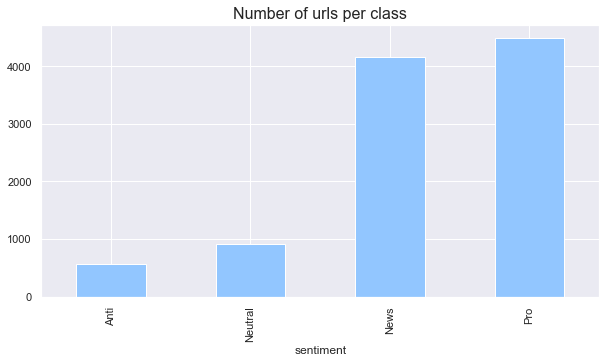

In [28]:
# Extract lists of urls and find the length of those lists

train_copy['url'] = train_copy['message'].apply(lambda x: len(re.findall(r'https\S+|www\S+',x)))
print('Number of urls per sentiment class')
train_copy.groupby('sentiment').sum()['url']

plot8 = plt.figure(figsize=(10,5))
plt.title('Number of urls per class',fontsize = 16)
train_copy.groupby('sentiment').sum()['url'].plot(kind='bar')
plt.show()

The above bar chart shows the number of urls per class

In [29]:
#Showing the full text of 10 Negative Sentiment Class tweets: ')
for tweet in senti_gb.get_group('Anti')['message'][100:110]:
    print(tweet)

@rambogooner The people saying “don’t look at the sun” are the same people who say climate change is real — and we all know that’s a lie.
RT @TheFoundingSon: NOAA scientists manipulated temperature data to make global warming seem worse

Who's surprised? Not me
https://t.co/Rj…
RT @GeorgiaLogCabin: NOAA's global warming data manipulation https://t.co/flujjaaWUR #Economy #National
It's really not about science at all, but religious fundamentalism of the climate change cult. With a sprinkling of… https://t.co/vV8L1zTsGq
RT @MarkACollett: The biggest threat to the environment isn't global warming, it's overpopulation that is fuelled by liberal aid to the thi…
RT @davidicke: Founder of Weather Channel blasts total fraud of climate change: Science fraud run by the Left…
@ABC Ya but all the experts say it's not climate change ass hat fake news it's a natural occurrence for thousands o… https://t.co/kvDP3USb8m
RT @JonoZalay: Here's a pic of arctic ice proving climate change...
Not falling for

In [30]:
#Showing the full text of 10 Neutral Sentiment Class tweets
for tweet in senti_gb.get_group('Neutral')['message'][1000:1010]:
    print(tweet)

RT @superlativemaui: climate change, healthcare, taxes, alzheimer's, supreme court, race and Ã°Å¸ï†Â³Ã¯Â¸ï†Ã¢â‚¬ï†Ã°Å¸Å’Ë† equality, immigration, policing, war, worÃ¢â‚¬Â¦
#Trumpland .. next, you'll be blaming him for climate change?! Fuck off you reprehensible creature https://t.co/ynLk5jQZ9J
Making the environment great again...Trump's environment chief says CO2 not main cause of global warming https://t.co/D0KBxKCkjr
Why do we have to make a deal to do OUR part for climate change? Why can't everyone just do their part for our planet?
@ValentinoKhan i always start my conversations talking about global warming, it's a real ice-breaker! High five! 🖐
straightedge felt really good but then I started working full time again in the season that makes me extremely suicidal fuck global warming
Takes 2 seconds. POLL: What do you think of Trump's executive order on climate change? https://t.co/OxE7V0Wn0g https://t.co/rIf5hYrGxz
RT @mitchellvii: Americans are even less worried about Russia th

In [31]:
#Showing the full text of 10 Pro Sentiment Class tweets
for tweet in senti_gb.get_group('Pro')['message'][100:110]:
    print(tweet)

#SDG13 is a call to take urgent action to combat #climate change and its impacts. Join the movement:Ã¢â‚¬Â¦ https://t.co/BqxZ5ZkBjv
RT @bradleym4: @JuddLegum Me (to my 14 yo kid): do you believe in climate change?
Kid: It's a scientific fact, so it doesn't matte…
RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦
When China calls out Donald Trump on climate change, you know itÃ¢â‚¬â„¢s bad https://t.co/ukXyPvuvJf
RT @billmckibben: 'ExxonMobil has a long history of peddling misinformation on climate change.' @elizkolbert in @NewYorker #ExxonKnew https…
RT @MrDenmore: Apart from taking us to the brink of recession, doubling the deficit and making us a pariah on refugees &amp; climate change, th…
RT @NatGeoChannel: One of the easiest ways to help combat climate change in your daily life is to stop eating beef. Here's why:Ã¢â‚¬Â¦
Effects of climate change https://t.co/6eYTZtqLoW
RT @marcuschown:

In [32]:
#Showing the full text of 10 News Class tweets
for tweet in senti_gb.get_group('News')['message'][100:110]:
    print(tweet)

RT @Wine_Newz: The #Wine industry in #Europe could be in trouble due to global warming, researchers warn https://t.co/1LErjnPpMI
Trump really doesn't want to face these 21 kids on climate change https://t.co/oHfhg9Gz1O https://t.co/ExhoFHE2KQ
RT @aggyk: Five Pacific islands lost to rising seas as climate change hits https://t.co/kmnBmFANdw
NASA is defiantly communicating climate change science despite Trump’s doubts' https://t.co/E3qtwWYV3Z  @NASAClimate Lift ‘em up, y’all!
RT @Fusion: Peru is suffering its worst floods in recent history—and some scientists say global warming is to blame: https://t.co/3EGbsYVNJq
RT @Environment_Ke: Kenya has ratified the Paris Agreement on climate change @JudiWakhungu @MyGovKe @NemaKenya @KeForestService…
RT @HuffingtonPost: California professors sign open letter to Trump urging action on climate change https://t.co/zQBYtItW7n https://t.co/bA…
RT @aireguru: California knocks Trump as it extends climate change effort: SAN FRANCISCO (AP) — Gov.… https://

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
- ⚡ Description: Data engineering ⚡ |

In this section we: cleaned the dataset, and created new features - as identified in the EDA phase.



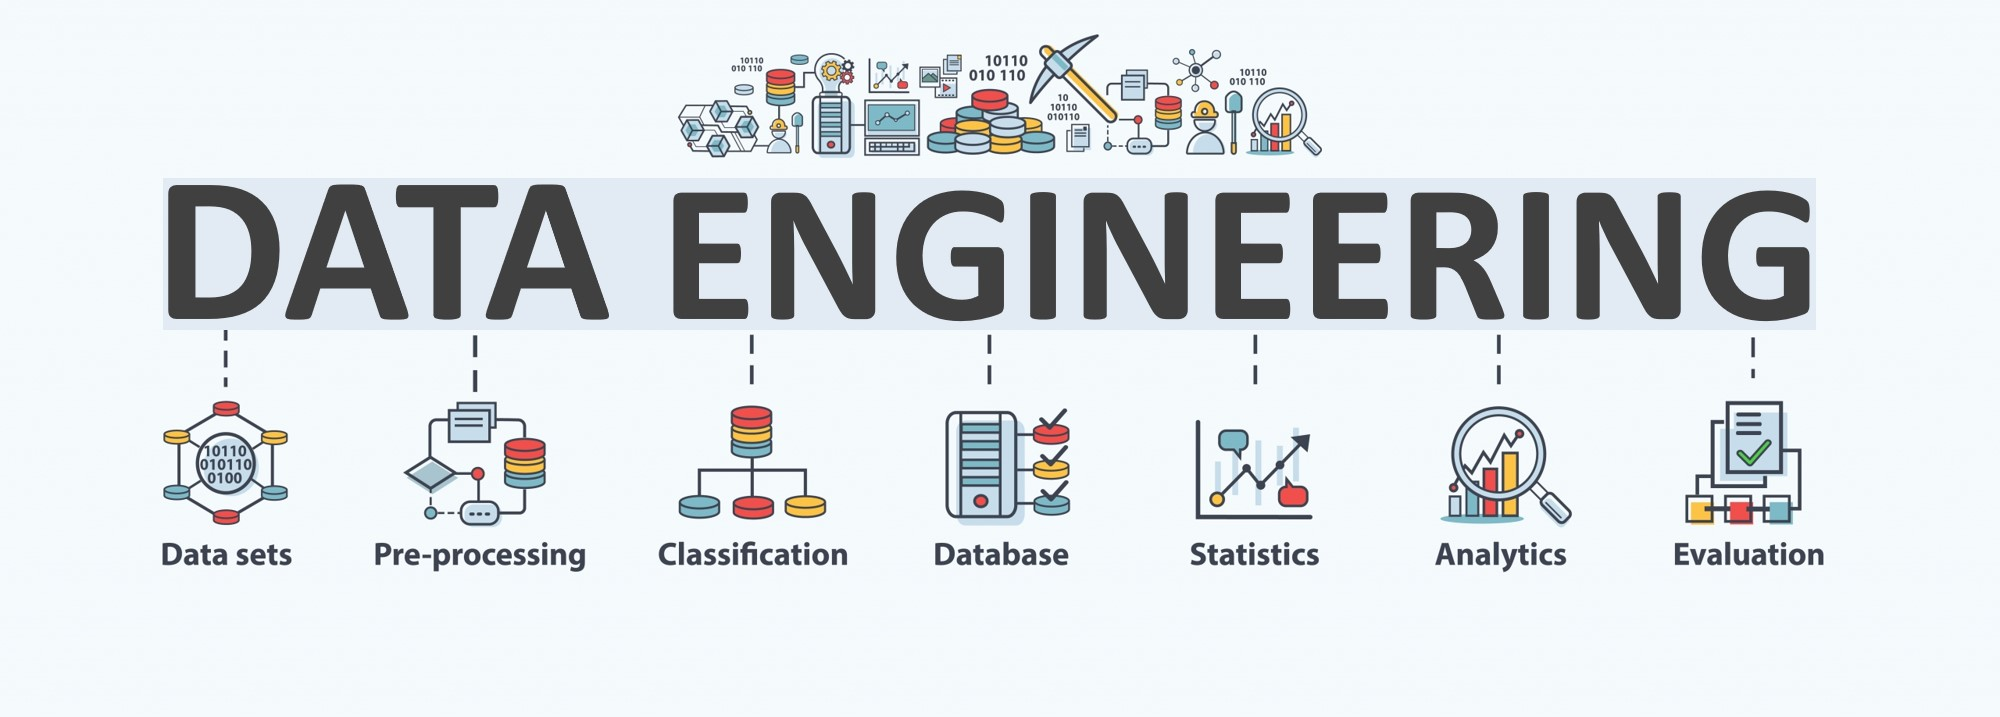

## 4.1 Tweet Cleaning

4.1.1 #### Remove Dupicate tweets

In [33]:
def remove_duplicates(df, column_name):
    """A function to remove all duplicates in a dataframe 
       and keep just the first occurance of it.
    """
    return df.drop_duplicates(subset=column_name, keep='first', inplace=True)

remove_duplicates(train_copy, 'message') #remove duplicate tweets from train dataset'''

In [34]:
#check shape of both dataset after removing duplicates
print(f'Train data shape after removing duplicates: {train_copy.shape}')
print(f'Train data shape after removing duplicates: {test_copy.shape}')

Train data shape after removing duplicates: (14229, 5)
Train data shape after removing duplicates: (10546, 2)


### 4.1.2 Url Handling

We decided to replace all url links in our tweet text with the word *url*
- This will help us to easily either remove it as at when we want to or
- Reduce the unique word count

In [35]:

#function to replace all url links with the word 'url'
def replace_tweet_urls(df, column_name):
    
    # Describing regrex url pattern
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    
    #substitute text to replace url
    sub_url = r'url'
    
    df[column_name] = df[column_name].replace(to_replace = pattern_url,
                            value = sub_url, 
                            regex = True) #train dataset
    return df

# Applying replace_tweet_urls function on both datasets replace all long urls with just 'url'  
replace_tweet_urls(train_copy, 'message')
replace_tweet_urls(test_copy, 'message')

message  tweetid
0      Europe will now be looking to China to make su...   169760
1      Combine this with the polling of staffers re c...    35326
2      The scary, unimpeachable evidence that climate...   224985
3      @Karoli @morgfair @OsborneInk @dailykos \r\nPu...   476263
4      RT @FakeWillMoore: 'Female orgasms cause globa...   872928
...                                                  ...      ...
10541  RT @BrittanyBohrer: Brb, writing a poem about ...   895714
10542  2016: the year climate change came home: Durin...   875167
10543  RT @loop_vanuatu: Pacific countries positive a...    78329
10544  RT @xanria_00018: You’re so hot, you must be t...   867455
10545  RT @chloebalaoing: climate change is a global ...   470892

[10546 rows x 2 columns]

### 4.1.3 Removing Unwanted Characters, Number, Stopwords and Coverting all to lowercase

This step is necessary because punctuations, numbers and special characters don't help in differentiating different kinds of tweets. If we skip this step, there is a higher chance that we will be working with noisy and inconsistent data. We will be replacing everything except characters and hashtags with spaces.

Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc. Stopwords do not contribute much to the machine learning model, so it's good to remove them. 

The process of lemmatization in natural language processing involves working with words according to their root lexical components. It is used in natural language processing and natural language understanding in computer programming and artificial intelligence. It is the process of converting a word to its base form called the *lemma*.


In [36]:
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()

# function to clean tweet. removes all puntuations, covert to lower
def df_cleaner(df):
    '''
    takes in a dataframe and cleans a specified column by, 
    removing all punctuations, numbers, stopwords, tokenises them
    
    '''
    df = re.sub('<[^<]+?>','', df)
    df = re.sub(r'[^\w\s]','',df, re.UNICODE)
    df = df.lower()
    df = [lemmatizer.lemmatize(token) for token in df.split(" ")]
    df = [lemmatizer.lemmatize(token, "v") for token in df]
    df = [word for word in df if not word in stop_words]
    df = ' '.join(df)
    df = ''.join([i for i in df if not i.isdigit()])
    
    return df



In [37]:
#applying the df_cleaner function on both datasets to clean the `message` columns
train_copy['message'] = train_copy.message.apply(lambda x: df_cleaner(x))
test_copy['message'] = test_copy.message.apply(lambda x: df_cleaner(x))

In [38]:
#visualising the cleaned columns
train_copy.head()

sentiment                                            message  tweetid  \
0       Pro  polyscimajor epa chief doesnt think carbon dio...   625221   
1       Pro       like lack evidence anthropogenic global warm   126103   
2      News  rt rawstory researcher say three year act clim...   698562   
3       Pro  todayinmaker wire   wa pivotal year war climat...   573736   
4       Pro  rt soynoviodetodas  racist sexist climate chan...   466954   

   hashtags  url  
0         0    1  
1         0    0  
2         0    2  
3         2    1  
4         1    0

In [39]:
#convert sentiment class back to numeric

def class_convert_2(df):
    
    df = train_copy.copy()
    numerical_class = []
    old_class = df['sentiment']
    
    for class_num in old_class:
        if class_num == 'News':
            numerical_class.append(2)
        elif class_num == 'Pro':
            numerical_class.append(1)
        elif class_num == 'Neutral':
            numerical_class.append(0)
        else:
            numerical_class.append(-1)
            
    df['sentiment'] = numerical_class
        
    return df

train_copy = class_convert_2(train_df)


In [40]:
train_copy.head()

sentiment                                            message  tweetid  \
0          1  polyscimajor epa chief doesnt think carbon dio...   625221   
1          1       like lack evidence anthropogenic global warm   126103   
2          2  rt rawstory researcher say three year act clim...   698562   
3          1  todayinmaker wire   wa pivotal year war climat...   573736   
4          1  rt soynoviodetodas  racist sexist climate chan...   466954   

   hashtags  url  
0         0    1  
1         0    0  
2         0    2  
3         2    1  
4         1    0

## 4.2 Data Resampling

Data imbalance, or imbalanced classes, is a common problem in machine learning classification where the training dataset contains a disproportionate ratio of samples in each class. Examples of real-world scenarios that suffer from class imbalance include threat detection, medical diagnosis, and spam filtering.

Resampling is the technique used to handle this problem

### 4.2.1 Imbalanced Dataset

Before we try to apply any of the model improvement method, we would like to make use of the raw imbalanced dataset for experimental purposes. Our goal is to use the raw imbalanced dataset as well as the other engineered dataset and compare the results to see which of our datasets gave the best predictive power 

In [41]:
#Split train dataset features into Predictor and Target
X_imbalanced = train_copy['message'] 
y_imbalanced = train_copy['sentiment'] 

unseen_X = test_copy['message'] 


Note: on data imbalance goes here

### 4.2.1 Downsampling

Downsampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm. the dataset becomes balanced with same number of observations in each class to preserve the distribution of the data.
One way of decreasing the variance in a dataset is to down-sample the data.

In [42]:
#check sentiment distribution to determine which sentiments needs upsampling
train_copy.groupby('sentiment').count()['message'].reset_index().sort_values(by='message')

sentiment  message
0         -1     1221
1          0     2244
3          2     3542
2          1     7222

It is clear that the Anti sentiment has the least representation in the dataset. We therefore, need to downsample the other three sentiments (News, Neutral and Pro) to have the same sample observation of 1221 just as the Anti sentiment. Doing so will eliminate the Bias within our dataset

In [43]:
'''
Downsampling the dataset

'''

#declaring our sentiment classes
pro = train_copy[train_copy['sentiment'] == 1]
news = train_copy[train_copy['sentiment'] == 2]
neutral =train_copy[train_copy['sentiment'] == 0]
anti = train_copy[train_copy['sentiment'] == -1]

##Upsample News sentiment
down_sampled_news = resample(news, replace=True, n_samples=len(anti))   

#Upsample Neutral sentiment
down_sampled_neutral = resample(neutral, replace=True, n_samples=len(anti)) 

#Upsample Anti sentiment
down_sampled_pro = resample(pro, replace=True, n_samples=len(anti)) 

down_sampled_df = pd.concat([down_sampled_pro, down_sampled_news, down_sampled_neutral, anti])

{'web': 'https://www.comet.com/api/image/download?imageId=61278a20b010437a948000fac534e82b&experimentKey=40e2e70eeb4045189e9c64f8ba88693e',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=61278a20b010437a948000fac534e82b&experimentKey=40e2e70eeb4045189e9c64f8ba88693e',
 'imageId': '61278a20b010437a948000fac534e82b'}

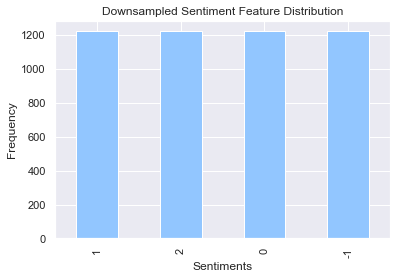

In [44]:
# visualise distribution of  Down sampled dataset
down_sampled_df['sentiment'].value_counts().plot(kind='bar')
plt.title('Downsampled Sentiment Feature Distribution')
plt.ylabel('Frequency')
plt.xlabel('Sentiments')
experiment.log_figure(figure_name='Down sampled Sentiment feature Distribution')

OBSERVATION:    
    Rows in all majority classes (1, 2 and 0) has been randomly reduced to have the same observation as the class -1 which originally had 1296 rows        

In [45]:
#Split Down sampled train dataset features into Predictors and Target 
X_down_sampled = down_sampled_df['message']
y_down_sampled = down_sampled_df['sentiment']

### 4.2.2 Upsampling

Upsampling is the process of randomly duplicating observations from the minority class to reinforce its signal. After this process, the counts of both labels are almost the same. This equalization procedure prevents the model from inclining towards the majority class.

In [46]:
#check sentiment distribution to determine which sentiments needs upsampling
train_copy.groupby('sentiment').count()['message'].reset_index().sort_values(by='message', ascending=False)

sentiment  message
2          1     7222
3          2     3542
1          0     2244
0         -1     1221

It is clear that thr Pro sentiment has the largest representation in the dataset. We therefore, need to upsample the other three sentiments (News, Neutral and Anti) to have the same sample observation of 7222 just as the Pro sentiment. Doing so will eliminate the Pro Sentiment Bias within our dataset

In [47]:
'''
Upsampling the dataset
'''

#declaring our sentiment classes
pro = train_copy[train_copy['sentiment'] == 1]
news = train_copy[train_copy['sentiment'] == 2]
neutral =train_copy[train_copy['sentiment'] == 0]
anti = train_copy[train_copy['sentiment'] == -1]

##Upsample News sentiment
upsampled_news = resample(news, replace=True, n_samples=len(pro))   

#Upsample Neutral sentiment
upsampled_neutral = resample(neutral, replace=True, n_samples=len(pro)) 

#Upsample Anti sentiment
upsampled_anti = resample(anti, replace=True, n_samples=len(pro)) 

upsample_df = pd.concat([pro, upsampled_news, upsampled_neutral, upsampled_anti])


{'web': 'https://www.comet.com/api/image/download?imageId=176a6024cbb7481b8dd08309ecb9559f&experimentKey=40e2e70eeb4045189e9c64f8ba88693e',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=176a6024cbb7481b8dd08309ecb9559f&experimentKey=40e2e70eeb4045189e9c64f8ba88693e',
 'imageId': '176a6024cbb7481b8dd08309ecb9559f'}

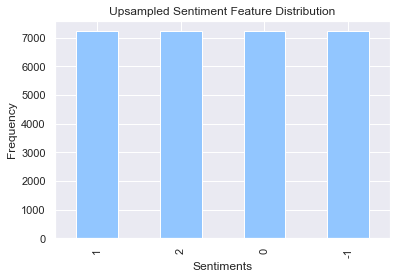

In [48]:
# visualise distribution of  Upsampled dataset
upsample_df['sentiment'].value_counts().plot(kind='bar')
plt.title('Upsampled Sentiment Feature Distribution')
plt.ylabel('Frequency')
plt.xlabel('Sentiments')
experiment.log_figure(figure_name='Upsampled Sentiment feature Distribution')

OBSERVATION:    
    Rows in all minority classes (2, 0 and -1) has been randomly increased to 8530 to have the same observation as the majority class 1       

In [49]:
#Split Upsampled train dataset features into Predictors and Target 
X_upsampled = upsample_df['message']
y_upsampled = upsample_df['sentiment']

<a id="five"></a>
# 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



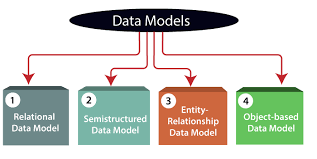

The process of modeling means training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data. Inputs and outputs of the modeling process. The output from modeling is a trained model that can be used for inference, making predictions on new data points.

In this modelling part we will be selecting few machine learning algorithms and we will train each of the selected model with the three different datasets (Imbalanced, Upsampled and Downsampled) that we have. 

Below are the list of our chosen models
1. Logistic Regression Model
2. Naive Bayes Model
3. Random Forest 
4. K-Nearest Neighbors
5. Support Vector Machine

## 5.1 Train Model Function

In trying to reduce repetition we created a function that splits our datasets using the train_test_split from sklearn, creates a data pipline which has the models, fits the model makes a prediction and provides the metrics for evaluation

In [51]:
def model_trainer(model, X, y):
    
    
    #"""create train model function"""
   
    
    # Creating an experiment with your api key
    experiment = Experiment(
        api_key="sj5muA45yTe4qncu3OyeXQ6W2",
        project_name="team-cw2-project",
        workspace="obengkojo23",
    )
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)
    
    pipe = Pipeline([('vect', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 3))),('tfidf', TfidfTransformer()),('model', model)])
    
    
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    f1_mscore = f1_score(y_test, y_pred, average='weighted')
    accuracy_mscore = accuracy_score(y_test, y_pred)
    recall_mscore = recall_score(y_test, y_pred, average='weighted')
    precision_mscore = precision_score(y_test, y_pred, average='weighted')
        
       
    print('Accuracy: ', accuracy_mscore)
    print('f1_score: ', f1_mscore)
    print('Recall: ', recall_mscore)
    print('Precision: ', precision_mscore)
    
    metrics = {'Accuracy':accuracy_mscore, 'f1_score':f1_mscore, 'Recall': recall_mscore, 'Precision':precision_mscore}
    #experiment.log_metrics(metrics)
    #experiment.end()
    return f1_mscore, accuracy_mscore, recall_mscore, precision_mscore
    

## 5.2 Logistic Regression

Contrary to its name, logistic regression is actually a classification technique that gives the probabilistic output of dependent categorical value based on certain independent variables.
Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

We make use of the multi-class logistic regression due to our number of labels.
Multi-class logistic regression is an extension technique that allows you to predict a class that can be one of three or more possible values. An example of multi-class classification is predicting the political leaning of a person (conservative, moderate, liberal) based on age, sex, annual income and so on. 

In our case we are to predict tweets belonging to four different classes (1, 0, 2 and -1)

In [52]:
#Creating an object of Logistic Regression
log_regression = LogisticRegression(multi_class='ovr')

### 5.2.1 Training Imbalanced Dataset on Logistic Regression Model

In [53]:
imbalanced_lr_f1, imbalanced_lr_accuracy, imbalanced_lr_recall, imbalanced_lr_presicion = model_trainer(log_regression, X_imbalanced, y_imbalanced)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/kendo-shin/first-project/40e2e70eeb4045189e9c64f8ba88693e
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     figures                      : 2
COMET INFO:     filename                     : 1
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: ---------------------------
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET ERROR: Run will

Accuracy:  0.6373858046380886
f1_score:  0.5734730980719949
Recall:  0.6373858046380886
Precision:  0.7167377197093072


### 5.2.2 Training Downsampled Dataset on Logistic Regression Model

In [56]:
downsampled_lr_f1, downsampled_lr_accuracy, downsampled_lr_recall, downsampled_lr_presicion = model_trainer(log_regression, X_down_sampled, y_down_sampled)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/obengkojo23/team-cw2-project/ad71cee86bd3470ebce69d4e6baf4895
COMET INFO:   Parameters:
COMET INFO:     C                        : 1.0
COMET INFO:     class_weight             : 1
COMET INFO:     dual                     : False
COMET INFO:     fit_intercept            : True
COMET INFO:     intercept_scaling        : 1
COMET INFO:     l1_ratio                 : 1
COMET INFO:     max_iter                 : 100
COMET INFO:     memory                   : 1
COMET INFO:     model                    : LogisticRegression(multi_class='ovr')
COMET INFO:     model_C                  : 1.0
COMET INFO:     model__C                 : 1.0
COMET INFO:     model__class_weight      : 1
COMET INFO:     model__dual              : False
COMET INFO:     model__fit_i

Accuracy:  0.6857727737973388
f1_score:  0.6830893900030046
Recall:  0.6857727737973388
Precision:  0.6848631990766236


### 5.2.3 Training Upsampled Dataset on Logistic Regression Model

In [58]:
upsampled_lr_f1, upsampled_lr_accuracy, upsampled_lr_recall, upsampled_lr_presicion = model_trainer(log_regression, X_upsampled, y_upsampled)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/obengkojo23/team-cw2-project/48e2cc6db2ec494aa9bd212a3180e32b
COMET INFO:   Parameters:
COMET INFO:     C                        : 1.0
COMET INFO:     class_weight             : 1
COMET INFO:     dual                     : False
COMET INFO:     fit_intercept            : True
COMET INFO:     intercept_scaling        : 1
COMET INFO:     l1_ratio                 : 1
COMET INFO:     max_iter                 : 100
COMET INFO:     memory                   : 1
COMET INFO:     model                    : LogisticRegression(multi_class='ovr')
COMET INFO:     model_C                  : 1.0
COMET INFO:     model__C                 : 1.0
COMET INFO:     model__class_weight      : 1
COMET INFO:     model__dual              : False
COMET INFO:     model__fit_i

Accuracy:  0.9008307372793354
f1_score:  0.8978245823243826
Recall:  0.9008307372793354
Precision:  0.9011562712176732


### 5.2.4 Logistic Regression Metric Score Summary

In [59]:
#creating a logistic regression metric score dictionary to hold for all the three varied datasets
log_regression_metric_dictionary = { 'Accuracy': [imbalanced_lr_accuracy, downsampled_lr_accuracy, upsampled_lr_accuracy],
                                    'Recall': [imbalanced_lr_recall, downsampled_lr_recall, upsampled_lr_recall], 
                                    'Precision': [imbalanced_lr_presicion, downsampled_lr_presicion, upsampled_lr_presicion], 
                                    'F1-Score': [imbalanced_lr_f1, downsampled_lr_f1, upsampled_lr_f1]} 

#Using the dictionary to create a dataframe for all the varied datasets
log_regression_df = pd.DataFrame(log_regression_metric_dictionary, index = ['Imbalanced_LR', 
                                                                            'Downsampled_LR', 
                                                                            'Upsampled_LR']).sort_values('F1-Score', ascending=False)
#showing the dataframe
log_regression_df

Accuracy    Recall  Precision  F1-Score
Upsampled_LR    0.900831  0.900831   0.901156  0.897825
Downsampled_LR  0.685773  0.685773   0.684863  0.683089
Imbalanced_LR   0.637386  0.637386   0.716738  0.573473

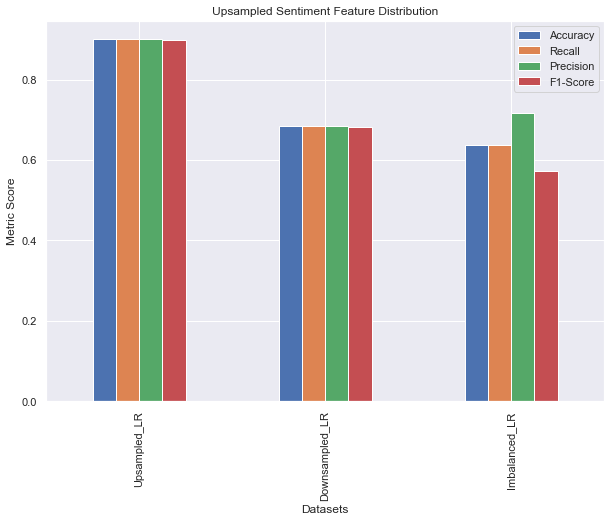

In [60]:
#Plotting the metric scores for all varied datasets

log_regression_df.plot(kind='bar', stacked=False, figsize=(10,7))
plt.title('Upsampled Sentiment Feature Distribution')
plt.ylabel('Metric Score')
plt.xlabel('Datasets')
experiment.log_figure(figure_name='Upsampled Sentiment feature Distribution')

OBSERVATION:    
    Upsampled dataset seems to be performing better than the imbalanced and downsampled ones      

## 5.3 Naive Bayes

In [61]:
#creating an object of Naive Bayes Model
naive_bayes = MultinomialNB()

### 5.3.1 Training Imbalanced Dataset on Naive Bayes Model

In [62]:
imbalanced_naiveb_f1, imbalanced_naiveb_accuracy, imbalanced_naiveb_recall, imbalanced_naiveb_presicion = model_trainer(naive_bayes, X_imbalanced, y_imbalanced)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/obengkojo23/team-cw2-project/fee28722ff774e7fab6550d9a8b2003e
COMET INFO:   Parameters:
COMET INFO:     C                        : 1.0
COMET INFO:     class_weight             : 1
COMET INFO:     dual                     : False
COMET INFO:     fit_intercept            : True
COMET INFO:     intercept_scaling        : 1
COMET INFO:     l1_ratio                 : 1
COMET INFO:     max_iter                 : 100
COMET INFO:     memory                   : 1
COMET INFO:     model                    : LogisticRegression(multi_class='ovr')
COMET INFO:     model_C                  : 1.0
COMET INFO:     model__C                 : 1.0
COMET INFO:     model__class_weight      : 1
COMET INFO:     model__dual              : False
COMET INFO:     model__fit_i

Accuracy:  0.607167955024596
f1_score:  0.5220011521864585
Recall:  0.607167955024596
Precision:  0.7364700418755911


### 5.3.2 Training Upsampled Dataset on Naive Bayes Model

In [63]:
upsampled_naiveb_f1, upsampled_naiveb_accuracy, upsampled_naiveb_recall, upsampled_naiveb_presicion = model_trainer(naive_bayes, X_upsampled, y_upsampled)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/obengkojo23/team-cw2-project/af5b12d9878a454f80c9c6ea2b2544aa
COMET INFO:   Parameters:
COMET INFO:     alpha               : 1.0
COMET INFO:     class_prior         : 1
COMET INFO:     fit_prior           : True
COMET INFO:     force_alpha         : warn
COMET INFO:     memory              : 1
COMET INFO:     model               : MultinomialNB()
COMET INFO:     model__alpha        : 1.0
COMET INFO:     model__class_prior  : 1
COMET INFO:     model__fit_prior    : True
COMET INFO:     model__force_alpha  : warn
COMET INFO:     model_alpha         : 1.0
COMET INFO:     model_class_prior   : 1
COMET INFO:     model_fit_prior     : True
COMET INFO:     model_force_alpha   : warn
COMET INFO:     neg_label           : 0
COMET INFO:     norm          

Accuracy:  0.8632744894427138
f1_score:  0.8532340722189211
Recall:  0.8632744894427138
Precision:  0.8711641957677724


### 5.3.3 Training Downsampled Dataset on Naive Bayes Model

In [64]:
downsampled_naiveb_f1, downsampled_naiveb_accuracy, downsampled_naiveb_recall, downsampled_naiveb_presicion = model_trainer(naive_bayes, X_down_sampled, y_down_sampled)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/obengkojo23/team-cw2-project/17632137fa4e4ab1848dcd94a54de38c
COMET INFO:   Parameters:
COMET INFO:     alpha               : 1.0
COMET INFO:     class_prior         : 1
COMET INFO:     fit_prior           : True
COMET INFO:     force_alpha         : warn
COMET INFO:     memory              : 1
COMET INFO:     model               : MultinomialNB()
COMET INFO:     model__alpha        : 1.0
COMET INFO:     model__class_prior  : 1
COMET INFO:     model__fit_prior    : True
COMET INFO:     model__force_alpha  : warn
COMET INFO:     model_alpha         : 1.0
COMET INFO:     model_class_prior   : 1
COMET INFO:     model_fit_prior     : True
COMET INFO:     model_force_alpha   : warn
COMET INFO:     neg_label           : 0
COMET INFO:     norm          

Accuracy:  0.6693961105424769
f1_score:  0.6670695736317559
Recall:  0.6693961105424769
Precision:  0.6703153072069995


### 5.3.4 Naive Bayes Metric Score Summary

In [65]:
#creating a Naive Bayes metric score dictionary to hold for all the three varied datasets
naive_bayes_metric_dictionary = { 'Accuracy': [imbalanced_naiveb_accuracy, downsampled_naiveb_accuracy, upsampled_naiveb_accuracy],
                                    'Recall': [imbalanced_naiveb_recall, downsampled_naiveb_recall, upsampled_naiveb_recall], 
                                    'Precision': [imbalanced_naiveb_presicion, downsampled_naiveb_presicion, upsampled_naiveb_presicion], 
                                    'F1-Score': [imbalanced_naiveb_f1, downsampled_naiveb_f1, upsampled_naiveb_f1]} 

#Using the dictionary to create a naive bayes dataframe for all the varied datasets
naive_bayes_df = pd.DataFrame(naive_bayes_metric_dictionary, index = ['Imbalanced_Naive_Bayes', 
                                                                            'Downsampled_Naive_Bayes', 
                                                                            'Upsampled_Naive_Bayes']).sort_values('F1-Score', ascending=False)
#showing the dataframe
naive_bayes_df

Accuracy    Recall  Precision  F1-Score
Upsampled_Naive_Bayes    0.863274  0.863274   0.871164  0.853234
Downsampled_Naive_Bayes  0.669396  0.669396   0.670315  0.667070
Imbalanced_Naive_Bayes   0.607168  0.607168   0.736470  0.522001

<AxesSubplot:title={'center':'Naive Bayes Model Metric Score for All Datasets'}>

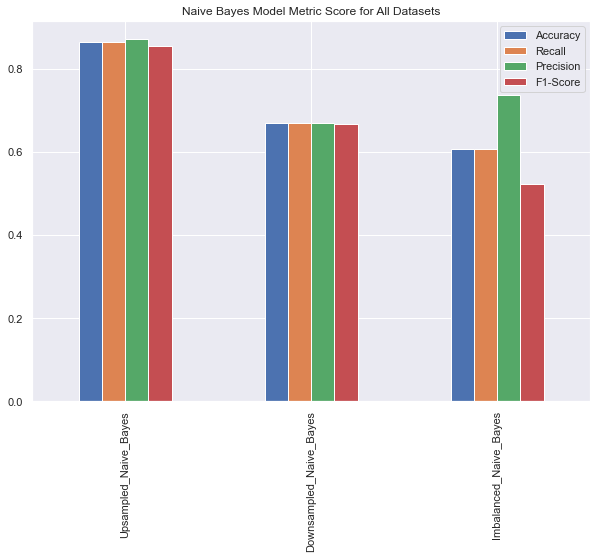

In [66]:

#Plotting the Naive Bayes metric scores for all varied datasets
naive_bayes_df.plot(kind='bar', stacked=False, title='Naive Bayes Model Metric Score for All Datasets', figsize=(10,7))


OBSERVATION:    
    Upsampled dataset seems to be performing better than the imbalanced and downsampled ones      

# 5.4 Random Forest

The random forest classifier is a supervised learning algorithm which you can use for regression and classification problems. It is among the most popular machine learning algorithms due to its high flexibility and ease of implementation. 

It consists of multiple decision trees just as a forest has many trees. On top of that, it uses randomness to enhance its accuracy and combat overfitting, which can be a huge issue for such a sophisticated algorithm. These algorithms make decision trees based on a random selection of data samples and get predictions from every tree. After that, they select the best viable solution through votes. 

Technically, it is an ensemble algorithm. The algorithm generates the individual decision trees through an attribute selection indication. Every tree relies on an independent random sample. In a classification problem, every tree votes and the most popular class is the end result.

In [67]:
rand_forest = RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1)

### 5.4.1 Training Imbalanced Dataset on Random Forest Model

In [68]:
imbalanced_randf_f1, imbalanced_randf_accuracy, imbalanced_randf_recall, imbalanced_randf_presicion = model_trainer(rand_forest, X_imbalanced, y_imbalanced)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/obengkojo23/team-cw2-project/1f5cbcd4719d4b05a6686dbc90e79569
COMET INFO:   Parameters:
COMET INFO:     alpha               : 1.0
COMET INFO:     class_prior         : 1
COMET INFO:     fit_prior           : True
COMET INFO:     force_alpha         : warn
COMET INFO:     memory              : 1
COMET INFO:     model               : MultinomialNB()
COMET INFO:     model__alpha        : 1.0
COMET INFO:     model__class_prior  : 1
COMET INFO:     model__fit_prior    : True
COMET INFO:     model__force_alpha  : warn
COMET INFO:     model_alpha         : 1.0
COMET INFO:     model_class_prior   : 1
COMET INFO:     model_fit_prior     : True
COMET INFO:     model_force_alpha   : warn
COMET INFO:     neg_label           : 0
COMET INFO:     norm          

Accuracy:  0.5031623330990864
f1_score:  0.33685295044314717
Recall:  0.5031623330990864
Precision:  0.253172333449716


### 5.4.2 Training Upsampled Dataset on Random Forest Model

In [69]:
upsampled_randf_f1, upsampled_randf_accuracy, upsampled_randf_recall, upsampled_randf_presicion = model_trainer(rand_forest, X_upsampled, y_upsampled)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/obengkojo23/team-cw2-project/0803d3f6f0714fecb08007f6bdf983be
COMET INFO:   Parameters:
COMET INFO:     bootstrap                       : True
COMET INFO:     ccp_alpha                       : 0.0
COMET INFO:     class_weight                    : 1
COMET INFO:     criterion                       : gini
COMET INFO:     max_depth                       : 5
COMET INFO:     max_features                    : 1
COMET INFO:     max_leaf_nodes                  : 1
COMET INFO:     max_samples                     : 1
COMET INFO:     memory                          : 1
COMET INFO:     min_impurity_decrease           : 0.0
COMET INFO:     min_samples_leaf                : 1
COMET INFO:     min_samples_split               : 2
COMET INFO:     min_weight_fractio

Accuracy:  0.27587400484596747
f1_score:  0.16057548660533744
Recall:  0.27587400484596747
Precision:  0.6833087822613626


### 5.4.3 Training Downsampled Dataset on Random Forest Model

In [70]:
downsampled_randf_f1, downsampled_randf_accuracy, downsampled_randf_recall, downsampled_randf_presicion = model_trainer(rand_forest, X_down_sampled, y_down_sampled)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/obengkojo23/team-cw2-project/4074431f650149629a49ed3a77482199
COMET INFO:   Parameters:
COMET INFO:     bootstrap                       : True
COMET INFO:     ccp_alpha                       : 0.0
COMET INFO:     class_weight                    : 1
COMET INFO:     criterion                       : gini
COMET INFO:     max_depth                       : 5
COMET INFO:     max_features                    : 1
COMET INFO:     max_leaf_nodes                  : 1
COMET INFO:     max_samples                     : 1
COMET INFO:     memory                          : 1
COMET INFO:     min_impurity_decrease           : 0.0
COMET INFO:     min_samples_leaf                : 1
COMET INFO:     min_samples_split               : 2
COMET INFO:     min_weight_fractio

Accuracy:  0.2538382804503582
f1_score:  0.135848111554172
Recall:  0.2538382804503582
Precision:  0.4833284631544169


### 5.4.4 Random Forest Metric Score Summary

In [71]:
#creating a Random Forest metric score dictionary to hold for all the three varied datasets
random_forest_metric_dictionary = { 'Accuracy': [imbalanced_randf_accuracy, downsampled_randf_accuracy, upsampled_randf_accuracy],
                                    'Recall': [imbalanced_randf_recall, downsampled_randf_recall, upsampled_randf_recall], 
                                    'Precision': [imbalanced_randf_presicion, downsampled_randf_presicion, upsampled_randf_presicion], 
                                    'F1-Score': [imbalanced_randf_f1, downsampled_randf_f1, upsampled_randf_f1]} 

#Using the dictionary to create a random forest dataframe for all the varied datasets
random_forest_df = pd.DataFrame(random_forest_metric_dictionary, index = ['Imbalanced_Random_Forest', 
                                                                            'Downsampled_Random_Forest', 
                                                                            'Upsampled_Random_Forest']).sort_values('F1-Score', ascending=False)
#showing the dataframe
random_forest_df

Accuracy    Recall  Precision  F1-Score
Imbalanced_Random_Forest   0.503162  0.503162   0.253172  0.336853
Upsampled_Random_Forest    0.275874  0.275874   0.683309  0.160575
Downsampled_Random_Forest  0.253838  0.253838   0.483328  0.135848

<AxesSubplot:title={'center':'Random Forest Model Metric Score for All Datasets'}>

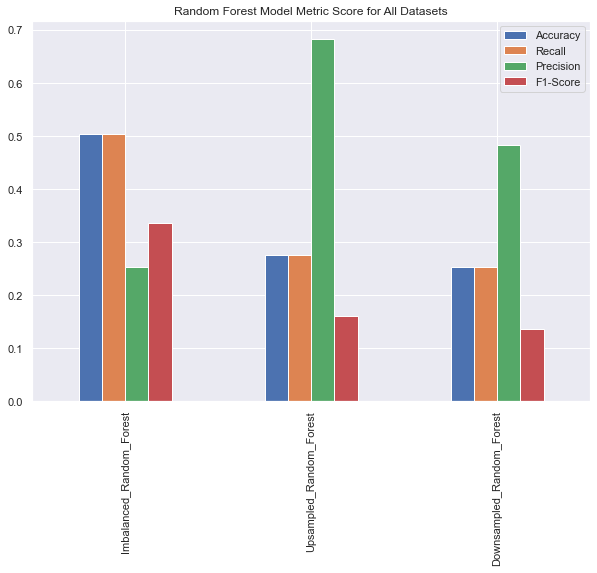

In [72]:
#Plotting the random forest metric scores for all varied datasets
random_forest_df.plot(kind='bar', stacked=False, title='Random Forest Model Metric Score for All Datasets', figsize=(10,7))

## 5.5 k-Nearest Neighbors Model (KNN)

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another. For classification problems, a class label is assigned on the basis of a majority vote—i.e. the label that is most frequently represented around a given data point is used. While this is technically considered “plurality voting”, the term, “majority vote” is more commonly used in literature. 

Advantages
- Easy to implement: Given the algorithm’s simplicity and accuracy, it is one of the first classifiers that a new data scientist will learn.
- Adapts easily: As new training samples are added, the algorithm adjusts to account for any new data since all training data is stored into memory.

- Few hyperparameters: KNN only requires a k value and a distance metric, which is low when compared to other machine learning algorithms.

The KNN has three implementation namely Gaussian, Multinomial and Bernoulli. However we chose to implement just the  Multinomial

**Multinomial:** Used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.


In [73]:
knn = KNeighborsClassifier(3)

### 5.5.1 Training Imbalanced Dataset on KNN Model

In [ ]:
imbalanced_knn_f1, imbalanced_knn_accuracy, imbalanced_knn_recall, imbalanced_knn_presicion = model_trainer(knn, X_imbalanced, y_imbalanced)

### 5.5.2 Training Upsample Dataset on KNN Model

In [ ]:
upsampled_knn_f1, upsampled_knn_accuracy, upsampled_knn_recall, upsampled_knn_presicion = model_trainer(knn, X_upsampled, y_upsampled)

### 5.5.3 Training Downsampled Dataset on KNN Model

In [ ]:
downsampled_knn_f1, downsampled_knn_accuracy, downsampled_knn_recall, downsampled_knn_presicion = model_trainer(knn, X_down_sampled, y_down_sampled)

### 5.5.4 KNN Metric Score Summary

In [92]:
#creating a KNN metric score dictionary to hold for all the three varied datasets
knn_metric_dictionary = { 'Accuracy': [imbalanced_knn_accuracy, downsampled_knn_accuracy, upsampled_knn_accuracy],
                                    'Recall': [imbalanced_knn_recall, downsampled_knn_recall, upsampled_knn_recall], 
                                    'Precision': [imbalanced_knn_presicion, downsampled_knn_presicion, upsampled_knn_presicion], 
                                    'F1-Score': [imbalanced_knn_f1, downsampled_knn_f1, upsampled_knn_f1]} 

#Using the dictionary to create a KNN dataframe for all the varied datasets
knn_df = pd.DataFrame(knn_metric_dictionary, index = ['Imbalanced_KNN', 
                                                                            'Downsampled_KNN', 
                                                                            'Upsampled_KNN']).sort_values('F1-Score', ascending=False)
#showing the dataframe
knn_df

Accuracy    Recall  Precision  F1-Score
Upsampled_KNN    0.824443  0.824443   0.828537  0.813364
Imbalanced_KNN   0.615676  0.615676   0.617445  0.615935
Downsampled_KNN  0.584378  0.584378   0.584927  0.580720

<AxesSubplot:title={'center':'KNN Model Metric Score for All Datasets'}>

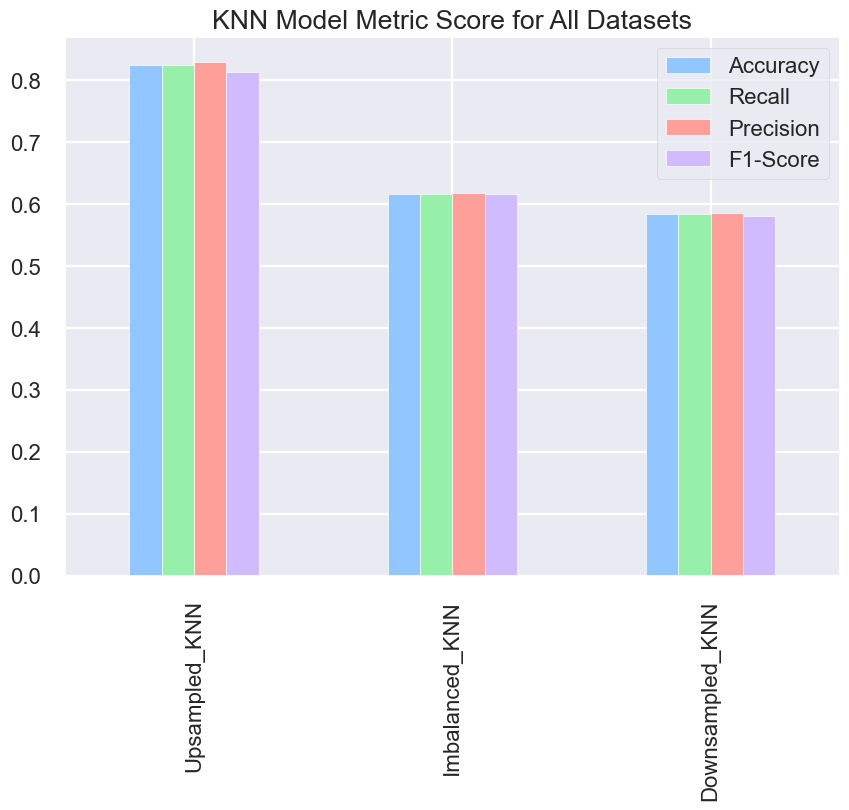

In [93]:
#Plotting the random forest metric scores for all varied datasets
knn_df.plot(kind='bar', stacked=False, title='KNN Model Metric Score for All Datasets', figsize=(10,7))

OBSERVATION:    
    Upsampled dataset seems to be performing better than the imbalanced and downsampled ones      

## 5.6 Support Vector Machine Model (SVM)

Support Vector Machine (SVM) is a relatively simple Supervised Machine Learning Algorithm used for classification and/or regression. It is more preferred for classification but is sometimes very useful for regression as well. Basically, SVM finds a hyper-plane that creates a boundary between the types of data. In 2-dimensional space, this hyper-plane is nothing but a line. In SVM, we plot each data item in the dataset in an N-dimensional space, where N is the number of features/attributes in the data. Next, find the optimal hyperplane to separate the data.

**Advantages**
They perform very well on a range of datasets.
They are versatile: different kernel functions can be specified, or custom kernels can also be defined for specific datatypes.
They work well for both high and low dimensional data.

##### SVM Kernels
A kernel is used to implement the SVM algorithm in practice. An input data space is transformed into the appropriate form using a kernel. The kernel trick is a technique used by SVM. The kernel transforms a low-dimensional input space into a higher-dimensional space in this case. To put it another way, it turns nonseparable issues into separable problems by adding more dimensions to them. It is most beneficial in problems with non-linear separation. The kernel trick aids in the development of a more accurate classifier.

We shall apply the following kernels:
- Linear Kernel
- Polynomial Kernel
- Radial Basis Function Kernel

## SVM POLYNOMIAL

In machine learning, the polynomial kernel is a kernel function commonly used with support vector machines (SVMs) and other kernelized models, that represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models.

Intuitively, the polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of these. In the context of regression analysis, such combinations are known as interaction features. The (implicit) feature space of a polynomial kernel is equivalent to that of polynomial regression, but without the combinatorial blowup in the number of parameters to be learned. When the input features are binary-valued (booleans), then the features correspond to logical conjunctions of input features

In [78]:
#creating an object of the polynomial SVM model
support_vector_machine = SVC(kernel='poly')

### 5.6.1 Training Imbalanced Dataset on SVM(Polynomial Kernel) 

In [79]:
imbalanced_svm_f1, imbalanced_svm_accuracy, imbalanced_svm_recall, imbalanced_svm_presicion = model_trainer(support_vector_machine, X_imbalanced, y_imbalanced)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/obengkojo23/team-cw2-project/2a6a0f45acc64495a4e416789c5e8167
COMET INFO:   Parameters:
COMET INFO:     algorithm            : auto
COMET INFO:     leaf_size            : 30
COMET INFO:     memory               : 1
COMET INFO:     metric               : minkowski
COMET INFO:     metric_params        : 1
COMET INFO:     model                : KNeighborsClassifier(n_neighbors=3)
COMET INFO:     model__algorithm     : auto
COMET INFO:     model__leaf_size     : 30
COMET INFO:     model__metric        : minkowski
COMET INFO:     model__metric_params : 1
COMET INFO:     model__n_jobs        : 1
COMET INFO:     model__n_neighbors   : 3
COMET INFO:     model__p             : 2
COMET INFO:     model__weights       : uniform
COMET INFO:     model_algorith

Accuracy:  0.5797610681658468
f1_score:  0.4857306843453968
Recall:  0.5797610681658468
Precision:  0.7366593389432463


### 5.6.2 Training Upsampled Dataset on SVM(Polynomial Kernel) 

In [ ]:
upsampled_svm_f1, upsampled_svm_accuracy, upsampled_svm_recall, upsampled_svm_presicion = model_trainer(support_vector_machine, X_upsampled, y_upsampled)

### 5.6.3 Training Downsampled Dataset on SVM(Polynomial Kernel) 

In [84]:
downsampled_svm_f1, downsampled_svm_accuracy, downsampled_svm_recall, downsampled_svm_presicion = model_trainer(support_vector_machine, X_down_sampled, y_down_sampled)

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/obengkojo23/team-cw2-project/b1a5d4ca800a49bcbb6bd5f04deb3e88
COMET INFO:   Parameters:
COMET INFO:     C                              : 1.0
COMET INFO:     break_ties                     : False
COMET INFO:     cache_size                     : 200
COMET INFO:     class_weight                   : 1
COMET INFO:     coef0                          : 0.0
COMET INFO:     decision_function_shape        : ovr
COMET INFO:     degree                         : 3
COMET INFO:     gamma                          : scale
COMET INFO:     kernel                         : poly
COMET INFO:     max_iter                       : -1
COMET INFO:     memory                         : 1
COMET INFO:     model                          : SVC(kernel='poly')
COMET INFO:     mod

Accuracy:  0.48311156601842375
f1_score:  0.47587238473248317
Recall:  0.48311156601842375
Precision:  0.7450283116048436


### 5.6.4 Support Vector Machine Metric Score Summary

In [102]:
#creating a Support Vector Machine metric score dictionary to hold for all the three varied datasets
support_vector_machine_metric_dictionary = { 'Accuracy': [imbalanced_svm_accuracy, downsampled_svm_accuracy, upsampled_svm_accuracy],
                                    'Recall': [imbalanced_svm_recall, downsampled_svm_recall, upsampled_svm_recall], 
                                    'Precision': [imbalanced_svm_presicion, downsampled_svm_presicion, upsampled_svm_presicion], 
                                    'F1-Score': [imbalanced_svm_f1, downsampled_svm_f1, upsampled_svm_f1]} 

#Using the dictionary to create a Support Vector Machine dataframe for all the varied datasets
support_vm_df = pd.DataFrame(support_vector_machine_metric_dictionary, index = ['Imbalanced_SVM', 
                                                                            'Downsampled_SVM', 
                                                                            'Upsampled_SVM']).sort_values('F1-Score', ascending=False)
#showing the dataframe
support_vm_df

Accuracy    Recall  Precision  F1-Score
Upsampled_SVM    0.956477  0.956477   0.961067  0.957018
Imbalanced_SVM   0.633375  0.633375   0.754685  0.555680
Downsampled_SVM  0.545805  0.545805   0.826272  0.547273

<AxesSubplot:title={'center':'Support Vector Machine Model Metric Score for All Datasets'}>

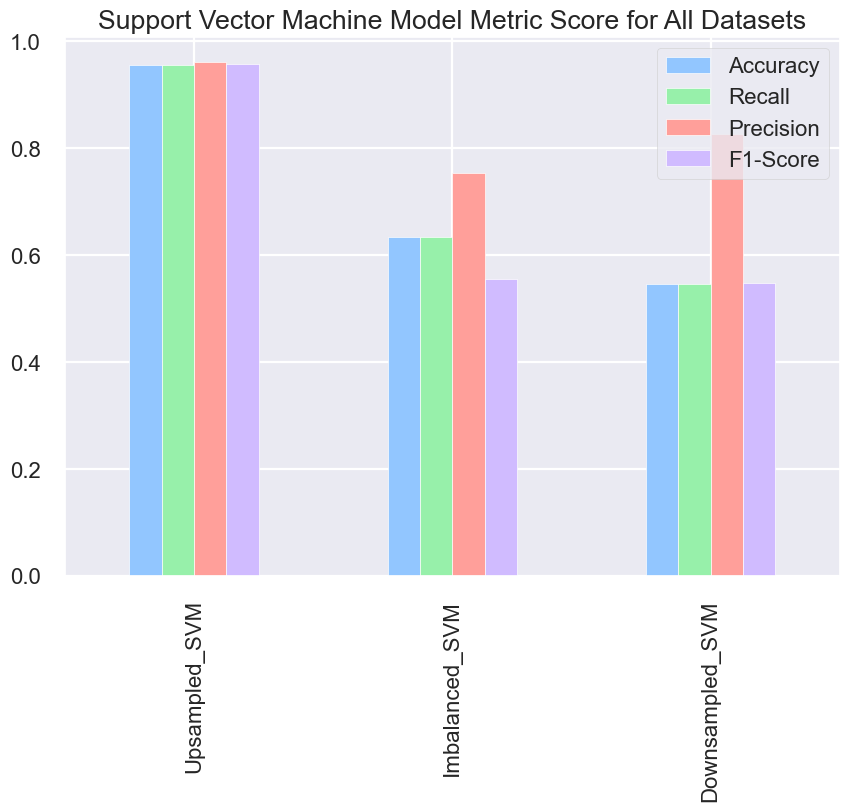

In [103]:
#Plotting the Support Vector Machine metric scores for all varied datasets
support_vm_df.plot(kind='bar', stacked=False, title='Support Vector Machine Model Metric Score for All Datasets', figsize=(10,7))

OBSERVATION:    
    Upsampled dataset seems to be performing better than the imbalanced and downsampled ones      

## SVM LINEAR

Linear classification is generally used on datasets with lower dimensions. The lower dimension of a dataset means that it has fewer features to classify. Hyperplane in both images can be obtained by measuring the distance (margin) between the hyperplane and the closest point in each class.

Examples of cases belonging to the linear classification are to determine whether age and dietary factors affect human health. Where in this case there are only two features that are factors that affect human health, namely the age factor as feature x and thqe food factor as feature y. The following is a visualization of the linear SVM case.

In [85]:
#Create a object of the Linear SVC model
linear_svc = SVC(kernel='linear') # Linear Kernel

### 5.6.6 Training Imbalanced Dataset on SVM(Linear Kernel) 

In [107]:
imbalanced_linearsvm_f1, imbalanced_linearsvm_accuracy, imbalanced_linearsvm_recall, imbalanced_linearsvm_presicion = model_trainer(linear_svc, X_imbalanced, y_imbalanced)

Accuracy:  0.7269279393173198
f1_score:  0.7054322928985061
Recall:  0.7269279393173198
Precision:  0.7307266995959105


### 5.6.7 Training Upsampled Dataset on SVM(Linear Kernel) 

In [108]:
upsampled_linearsvm_f1, upsampled_linearsvm_accuracy, upsampled_linearsvm_recall, upsampled_linearsvm_presicion = model_trainer(linear_svc, X_upsampled, y_upsampled)

Accuracy:  0.9454865181711606
f1_score:  0.9448750787730222
Recall:  0.9454865181711606
Precision:  0.9451867480109031


### 5.6.8 Training Downsampled Dataset on SVM(Linear Kernel) 

In [109]:
downsampled_linearsvm_f1, downsampled_linearsvm_accuracy, downsampled_linearsvm_recall, downsampled_linearsvm_presicion = model_trainer(linear_svc, X_down_sampled, y_down_sampled)

Accuracy:  0.7348119575699132
f1_score:  0.7334386111965864
Recall:  0.7348119575699132
Precision:  0.7331964856642585


### 5.6.9 SVM(Linear Kernel) Metric Score Summary

In [110]:
#creating a Linear Support Vector Machine metric score dictionary to hold for all the three varied datasets
linear_svm_metric_dictionary = { 'Accuracy': [imbalanced_linearsvm_accuracy, downsampled_linearsvm_accuracy, upsampled_linearsvm_accuracy],
                                    'Recall': [imbalanced_linearsvm_recall, downsampled_linearsvm_recall, upsampled_linearsvm_recall], 
                                    'Precision': [imbalanced_linearsvm_presicion, downsampled_linearsvm_presicion, upsampled_linearsvm_presicion], 
                                    'F1-Score': [imbalanced_linearsvm_f1, downsampled_linearsvm_f1, upsampled_linearsvm_f1]} 

#Using the dictionary to create a Linear Support Vector Machine dataframe for all the varied datasets
linear_svm_df = pd.DataFrame(linear_svm_metric_dictionary, index = ['Imbalanced_LinearSVM', 
                                                                            'Downsampled_LinearSVM', 
                                                                            'Upsampled_LinearSVM']).sort_values('F1-Score', ascending=False)
#showing the dataframe
linear_svm_df

Accuracy    Recall  Precision  F1-Score
Upsampled_LinearSVM    0.945487  0.945487   0.945187  0.944875
Downsampled_LinearSVM  0.734812  0.734812   0.733196  0.733439
Imbalanced_LinearSVM   0.726928  0.726928   0.730727  0.705432

<AxesSubplot:title={'center':'Linear Support Vector Machine Model Metric Score for All Datasets'}>

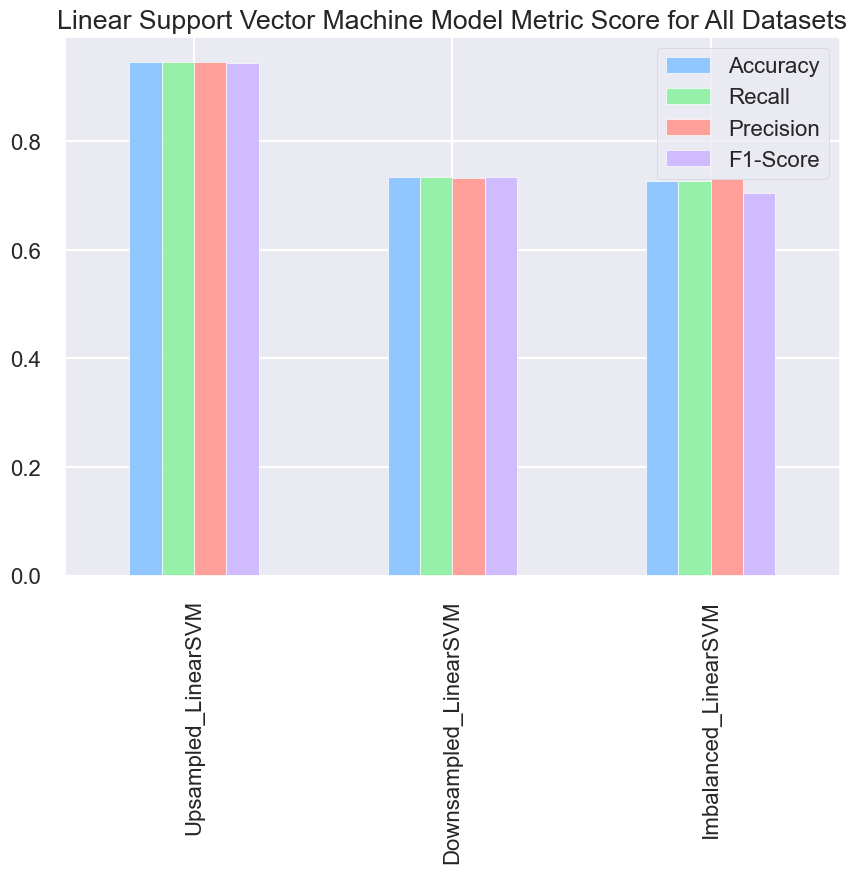

In [111]:
#Plotting the Linear Support Vector Machine metric scores for all varied datasets
linear_svm_df.plot(kind='bar', stacked=False, title='Linear Support Vector Machine Model Metric Score for All Datasets', figsize=(10,7))

OBSERVATION:    
    Upsampled dataset seems to be performing better than the imbalanced and downsampled ones      

## SVM (Radial Basis Function)

RBF kernels are the most generalized form of kernelization and is one of the most widely used kernels due to its similarity to the Gaussian distribution.

Kernel Function is a method used to take data as input and transform it into the required form of processing data. “Kernel” is used due to a set of mathematical functions used in Support Vector Machine providing the window to manipulate the data. So, Kernel Function generally transforms the training set of data so that a non-linear decision surface is able to transform to a linear equation in a higher number of dimension spaces.

In [112]:
# Create a SVC classifier using an RBF kernel
rbf_svc = SVC(kernel='rbf')

### 5.6.10 Training Imbalanced Dataset on SVM(rdf Kernel) 

In [113]:
imbalanced_rbfsvc_f1, imbalanced_rbfsvc_accuracy, imbalanced_rbfsvc_recall, imbalanced_rbfsvc_presicion = model_trainer(rbf_svc, X_imbalanced, y_imbalanced)

Accuracy:  0.6782553729456384
f1_score:  0.6221139339425358
Recall:  0.6782553729456384
Precision:  0.7626472342048592


### 5.6.11 Training Upsampled Dataset on SVM(Linear Kernel) 

In [115]:
upsampled_rbfsvc_f1, upsampled_rbfsvc_accuracy, upsampled_rbfsvc_recall, upsampled_rbfsvc_presicion = model_trainer(rbf_svc, X_upsampled, y_upsampled)

Accuracy:  0.9572098475967175
f1_score:  0.9574302038541347
Recall:  0.9572098475967175
Precision:  0.9580310251078392


### 5.6.12 Training Downsampled Dataset on SVM(Linear Kernel) 

In [114]:
downsampled_rbfsvc_f1, downsampled_rbfsvc_accuracy, downsampled_rbfsvc_recall, downsampled_rbfsvc_presicion = model_trainer(rbf_svc, X_down_sampled, y_down_sampled)

Accuracy:  0.7155255544840887
f1_score:  0.7130991198225891
Recall:  0.7155255544840887
Precision:  0.7458143958845789


### 5.6.14 SVM(RBF Kernel) Metric Score Summary

In [116]:
#creating a Linear Support Vector Machine metric score dictionary to hold for all the three varied datasets
rbf_svm_metric_dictionary = { 'Accuracy': [imbalanced_rbfsvc_accuracy, downsampled_rbfsvc_accuracy, upsampled_rbfsvc_accuracy],
                                    'Recall': [imbalanced_rbfsvc_recall, downsampled_rbfsvc_recall, upsampled_rbfsvc_recall], 
                                    'Precision': [imbalanced_rbfsvc_presicion, downsampled_rbfsvc_presicion, upsampled_rbfsvc_presicion], 
                                    'F1-Score': [imbalanced_rbfsvc_f1, downsampled_rbfsvc_f1, upsampled_rbfsvc_f1]} 

#Using the dictionary to create a Linear Support Vector Machine dataframe for all the varied datasets
rbf_svm_df = pd.DataFrame(rbf_svm_metric_dictionary, index = ['Imbalanced_rbfSVM', 
                                                                            'Downsampled_rbfSVM', 
                                                                            'Upsampled_rbfSVM']).sort_values('F1-Score', ascending=False)
#showing the dataframe
rbf_svm_df

Accuracy    Recall  Precision  F1-Score
Upsampled_rbfSVM    0.957210  0.957210   0.958031  0.957430
Downsampled_rbfSVM  0.715526  0.715526   0.745814  0.713099
Imbalanced_rbfSVM   0.678255  0.678255   0.762647  0.622114

<AxesSubplot:title={'center':'RBF Support Vector Machine Model Metric Score for All Datasets'}>

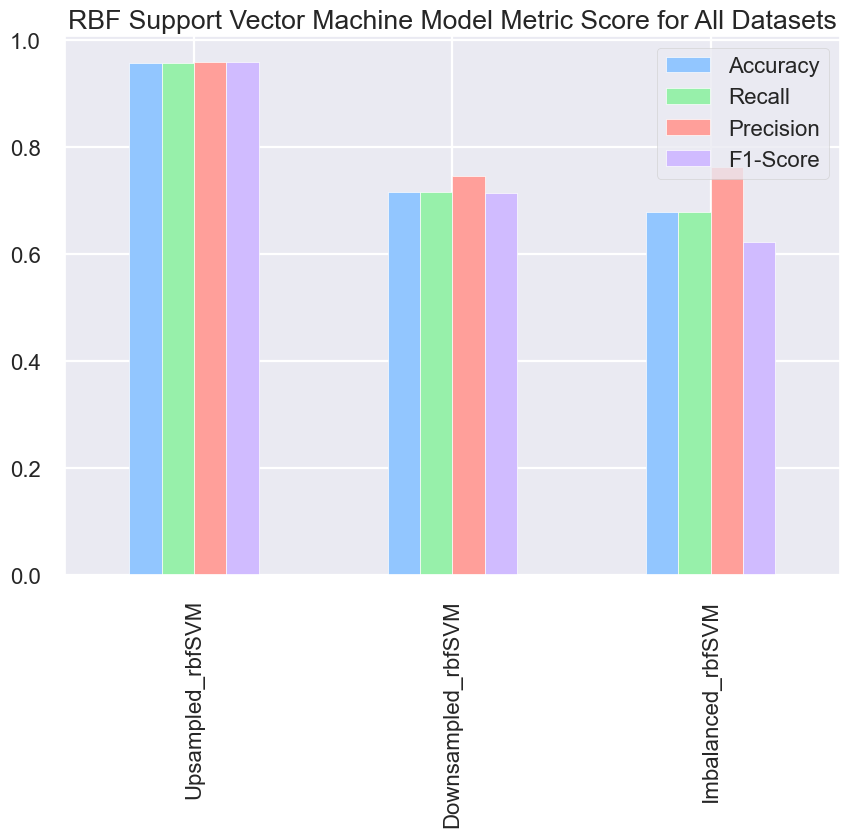

In [117]:
#Plotting the Linear Support Vector Machine metric scores for all varied datasets
rbf_svm_df.plot(kind='bar', stacked=False, title='RBF Support Vector Machine Model Metric Score for All Datasets', figsize=(10,7))

OBSERVATION:    
    Upsampled dataset seems to be performing better than the imbalanced and downsampled ones      

OBSERVATION:    
    Upsampled dataset seems to be performing better than the imbalanced and downsampled ones      

<a id="six"></a>
## 6. Model Performance Comparison
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

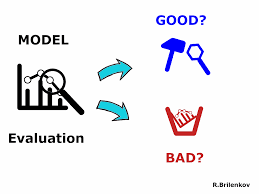

In [121]:
# Visualising the performance of all models together
metrics_compared = pd.concat([log_regression_df, naive_bayes_df, random_forest_df, knn_df, support_vm_df, linear_svm_df, rbf_svm_df]).sort_values('F1-Score', ascending=False)

In [122]:
#showing table of model metric comparison
metrics_compared

Accuracy    Recall  Precision  F1-Score
Upsampled_rbfSVM           0.957210  0.957210   0.958031  0.957430
Upsampled_SVM              0.956477  0.956477   0.961067  0.957018
Upsampled_LinearSVM        0.945487  0.945487   0.945187  0.944875
Upsampled_LR               0.918083  0.918083   0.918884  0.915735
Upsampled_Naive_Bayes      0.883499  0.883499   0.891057  0.876332
Upsampled_KNN              0.824443  0.824443   0.828537  0.813364
Downsampled_LinearSVM      0.734812  0.734812   0.733196  0.733439
Downsampled_LR             0.723240  0.723240   0.721121  0.720223
Downsampled_rbfSVM         0.715526  0.715526   0.745814  0.713099
Downsampled_Naive_Bayes    0.711668  0.711668   0.709680  0.708926
Imbalanced_LinearSVM       0.726928  0.726928   0.730727  0.705432
Imbalanced_rbfSVM          0.678255  0.678255   0.762647  0.622114
Imbalanced_KNN             0.615676  0.615676   0.617445  0.615935
Imbalanced_LR              0.673198  0.673198   0.740284  0.614935
Downsampled_KNN            0.584378  0.584378   0.584927  0.580720
Imbalanced_Naive_Bayes     0.646018  0.646018   0.762220  0.565550
Imbalanced_SVM             0.633375  0.633375   0.754685  0.555680
Downsampled_SVM            0.545805  0.545805   0.826272  0.547273
Imbalanced_Random_Forest   0.545512  0.545512   0.297583  0.385094
Downsampled_Random_Forest  0.300868  0.300868   0.537892  0.212559
Upsampled_Random_Forest    0.274766  0.274766   0.765433  0.158080

<AxesSubplot:title={'center':'Model Performance Comparison'}>

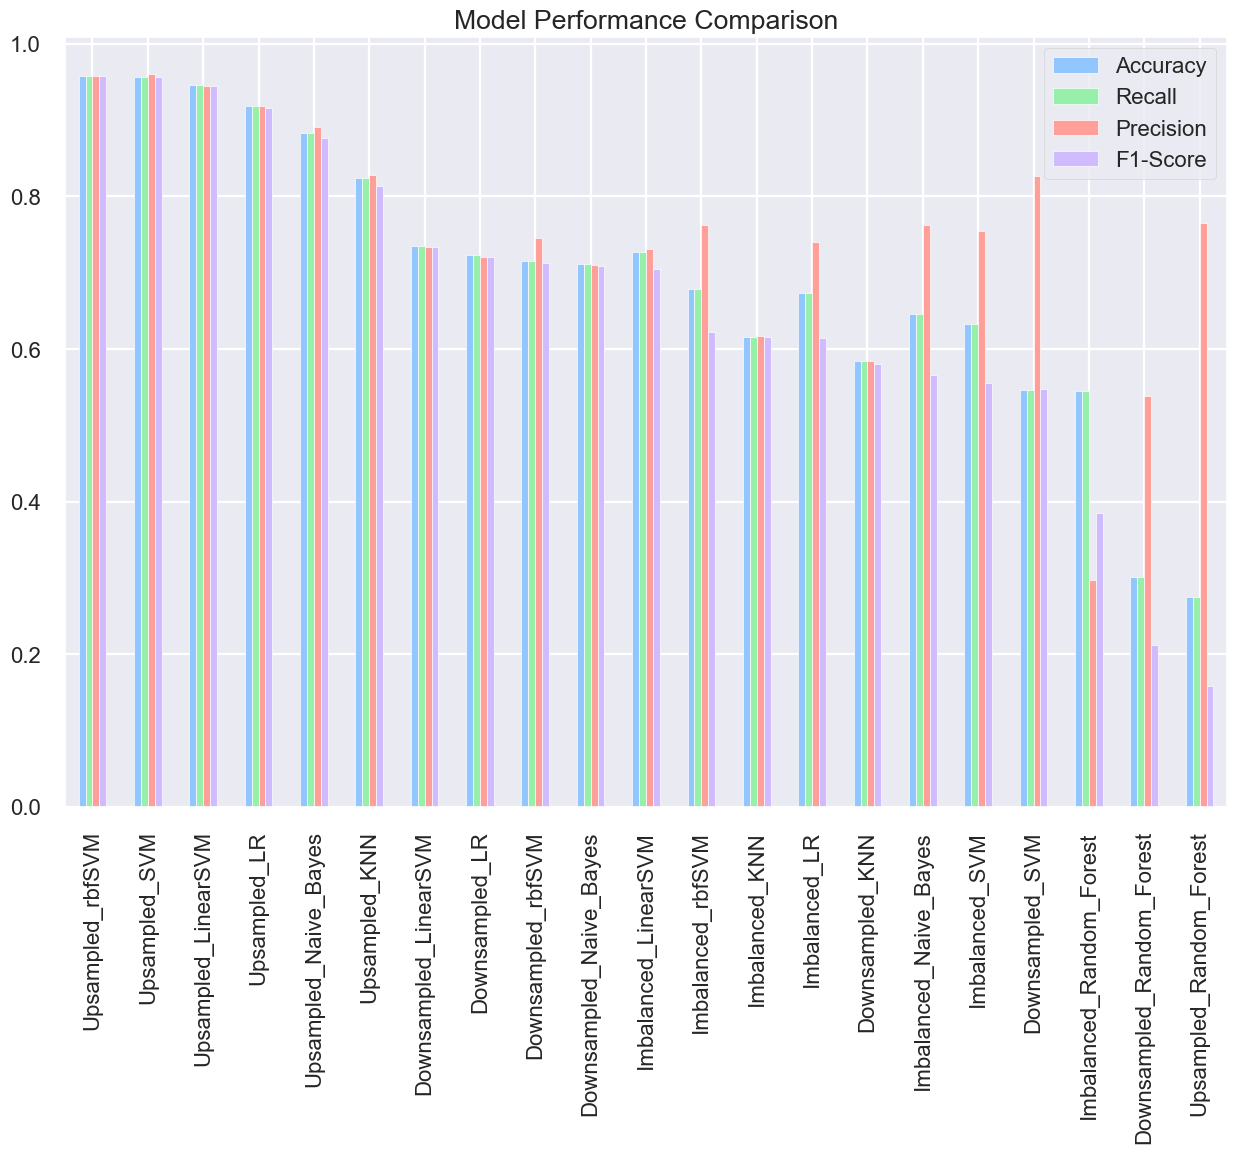

In [123]:
#Visualising the performance of all models side by side
metrics_compared.plot(kind='bar', stacked=False, title='Model Performance Comparison', figsize=(15,10))

## Predict Function

In [124]:
#create predict function
def test_target_predictor(model, X, y, test):
    
    pipe = Pipeline([('vect', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 3))),
                     ('tfidf', TfidfTransformer()),
                     ('model', model)])
    
    pipe.fit(X, y)
    y_pred = pipe.predict(test)
    
    return y_pred

In [125]:
y_pred_Upsampled_SVM = test_target_predictor(support_vector_machine, X_upsampled, y_upsampled, unseen_X)
y_pred_Upsampled_LR = test_target_predictor(log_regression, X_upsampled, y_upsampled, unseen_X)
y_pred_Upsampled_Naive_Bayes = test_target_predictor(naive_bayes, X_upsampled, y_upsampled, unseen_X)



In [126]:
y_pred_Upsampled_KNN = test_target_predictor(knn, X_upsampled, y_upsampled, unseen_X)
y_pred_Upsampled_Random_Forest = test_target_predictor(rand_forest, X_upsampled, y_upsampled, unseen_X)

In [127]:
y_pred_linear_svm = test_target_predictor(linear_svc, X_upsampled, y_upsampled, unseen_X)
y_pred_rbf_svm = test_target_predictor(rbf_svc, X_upsampled, y_upsampled, unseen_X)

In [198]:
y_pred_rbf_svm

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [200]:
#Making the tweetid to be the idex
test = test_copy.set_index('tweetid')
final_test = test.index


#Creating the kaggle submission Dataframe
final_dataframe = {'tweetid': final_test, 'sentiment':np.round(y_pred_rbf_svm, 0)}
k_submission = pd.DataFrame(data=final_dataframe)
k_submission = k_submission[['tweetid', 'sentiment']]

In [201]:
k_submission.shape

(10546, 2)

In [202]:
k_submission.set_index('tweetid').head()

sentiment
tweetid           
169760           1
35326            1
224985           1
476263           1
872928           0

In [203]:
k_submission.to_csv('rbfsvc_submission.csv', index = False) #wrting csv file

<a id="seven"></a>
## 7. Model Tuning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
⚡ Description: Detail Explanation of our Chosen Model ⚡


---

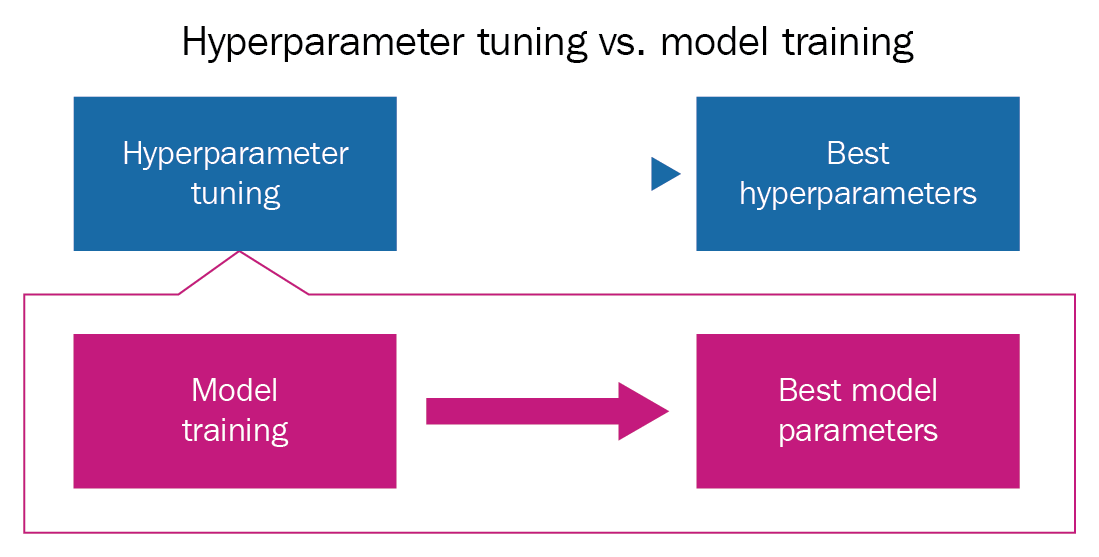

In [ ]:
# use 80% for the training and 20% for the test
x_train, x_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, 
                                                    stratify=y_upsampled, 
                                                    random_state=1, 
                                                    test_size=0.2, shuffle=True)


# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)





from sklearn import svm

# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test_vec)







y_pred_svm = svm.predict(x_test_vec)
y_pred_svm




#Making the tweetid to be the idex
test3=test_copy.set_index('tweetid')


#Sellecting the index of the test dataframe
final_test3 = test3.index




#Creating the kaggle submission Dataframe
final_dataframe3 = {'tweetid': final_test3, 'sentiment':np.round(y_pred_svm, 0)}
submission3 = pd.DataFrame(data=final_dataframe3)
submission3 = submission3[['tweetid', 'sentiment']]



y_pred_svc = svm.predict(unseen_X)
y_pred_svc





#Getting the predicted sentimet from test dataset
y_pred_svm.shape






print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')






print(classification_report(y_test, y_pred_svm))






parameters = {'kernel':('linear', 'rbf', 'poly'),
              'C':(0.25,1.0),
              'gamma': (1,2)}






param_grid = {'C':[1, 10, 100, 1000],
              'gamma':[1, 0.1, 0.001, 0.0001], 
              'kernel':['linear', 'rbf', 'poly']}





grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)





grid.fit(X_train,y_train)




svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)

In [214]:
train_copy.head()

sentiment                                            message  tweetid
0          1  polyscimajor epa chief doesnt think carbon dio...   625221
1          1       like lack evidence anthropogenic global warm   126103
2          2  rt rawstory researcher say three year act clim...   698562
3          1  todayinmaker wire  wa pivotal year war climate...   573736
4          1  rt soynoviodetodas  racist sexist climate chan...   466954

In [215]:
new_df = train_copy.copy()

In [211]:
vect = CountVectorizer(stop_words='english',
                             min_df=2,
                             max_df=0.5,
                             ngram_range=(1, 3))
new_df['message'] = vect.fit(new_df['message'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size = 0.2, random_state=20)

In [ ]:
def svc_tuning(model, X, y, test):
    
    X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size = 0.2, random_state=20)
    
    pipe = Pipeline([('vect', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 3))),
                     ('tfidf', TfidfTransformer()),
                     ('model', model)])
    
    pipe.fit(X, y)
    y_pred = pipe.predict(test)
    
    return y_pred

In [ ]:
pipe = Pipeline([('vect', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 3))),('tfidf', TfidfTransformer()),('model', model)])
    

In [ ]:
param_grid = {'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001], 
              'kernel':['linear','rbf', 'poly']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [86]:
# To end all experiments
experiment.end()

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
⚡ Description: Detail Explanation of our Chosen Model ⚡


---

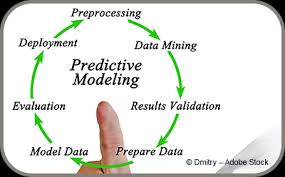

The best model is upsampled Radial Basis Function Kernel (RBF) Support Vector Machines (SVM).

This model was choosen after carrying out series of model performance metrices;
- Accuracy
  Accuracy = Number of correct predictions Total number of predictions
- Recall
  Recall is defined as the ratio of true positives to the sum of true positives and false negatives.
- Precision
  is defined as the ratio of true positives to the sum of true and false positives.
- F1-Score
  The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the   expected performance of the model is.

# References

sklearn.feature_extraction.text.TfidfVectorizer https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html


Support Vector Machine — Simply Explained https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496

What is Data Imbalance in Machine Learning? https://hackernoon.com/what-is-data-imbalance-in-machine-learning-932f34n8

What is Logistic Regression? https://machinelearningknowledge.ai/python-sklearn-logistic-regression-tutorial-with-example/
pip install imblearn

How to Do Multi-Class Logistic Regression Using C# https://visualstudiomagazine.com/articles/2020/02/11/logistic-regression.aspx#:~:text=Multi-class%20logistic%20regression%20is%20an%20extension%20technique%20that,on%20age%2C%20sex%2C%20annual%20income%20and%20so%20on.

K-Nearest Neighbors Algorithm https://www.ibm.com/topics/knn

Random Forest Classifier: Overview, How Does it Work, Pros & Cons https://www.upgrad.com/blog/random-forest-classifier/ 

Introduction to Support Vector Machines (SVM) https://www.geeksforgeeks.org/introduction-to-support-vector-machines-svm/

Support Vector Machines (SVM) Algorithm Explained https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/

Polynomial kernel https://en.wikipedia.org/wiki/Polynomial_kernel

Major Kernel Functions in Support Vector Machine (SVM) https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/

Support Vector Machine (SVM) and Kernels Trick https://medium.com/analytics-vidhya/introduction-to-svm-and-kernel-trick-part-1-theory-d990e2872ace
